## PRMD9 Binding Sites

In [444]:
import pandas as pd
from pybedtools import BedTool
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import re

In [445]:
def filter_hdna(df):
    df["sequence_length"] = df["sequence"].apply(len)
    df["pyrine"] = df["sequence"].str.count("g|a").div(df["sequence_length"])
    df["pyrimidine"] = df["sequence"].str.count("c|t").div(df["sequence_length"])
    df["at_content"] = df["sequence"].str.count("a|t").div(df["sequence_length"])
    df = df[((df["pyrimidine"] >= 0.9) | (df["pyrine"] >= 0.9)) & (df["at_content"] < 0.8)].reset_index(drop=True)
    return df

mirror_df = pd.read_table("../transfer_mirror/mirrors/chm13v2.0_MR.processed.tsv.gz")
hdna_df = filter_hdna(mirror_df)
print(mirror_df.shape, hdna_df.shape)
hdna_bed = BedTool.from_dataframe(hdna_df[["seqID", "start", "end", "sequence"]]).sort()
hdna_df

(1256992, 18) (235970, 18)


,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,composition,sequence_length,pyrine,pyrimidine,at_content
0,chr1,50042,50071,ggagggaggga,ggcagaa,ggagggagggaggcagaaagggagggagg,11,7,29,3,8,0,0,3A/0C/8G/0T,29,0.965517,0.034483,0.310345
1,chr1,50059,50086,aagggaggga,ggcagaa,aagggagggaggcagaaagggagggaa,10,7,27,4,6,0,0,4A/0C/6G/0T,27,0.962963,0.037037,0.407407
2,chr1,50082,50111,ggaaggaagga,gcaagga,ggaaggaaggagcaaggaaggaaggaagg,11,7,29,5,6,0,0,5A/0C/6G/0T,29,0.965517,0.034483,0.448276
3,chr1,50095,50117,aaggaaggaag,.,aaggaaggaaggaaggaaggaa,11,0,22,6,5,0,0,6A/0C/5G/0T,22,1.000000,0.000000,0.545455
4,chr1,50097,50119,ggaaggaagga,.,ggaaggaaggaaggaaggaagg,11,0,22,5,6,0,0,5A/0C/6G/0T,22,1.000000,0.000000,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235965,chrY,62192837,62192864,ctctctctctctc,t,ctctctctctctctctctctctctctc,13,1,27,0,0,7,6,0A/7C/0G/6T,27,0.000000,1.000000,0.481481
235966,chrY,62247108,62247130,aaagaaggaag,.,aaagaaggaaggaaggaagaaa,11,0,22,7,4,0,0,7A/0C/4G/0T,22,1.000000,0.000000,0.636364
235967,chrY,62247260,62247284,gggagggagg,ggat,gggagggaggggatggagggaggg,10,4,24,2,8,0,0,2A/0C/8G/0T,24,0.958333,0.041667,0.250000
235968,chrY,62255805,62255833,aggaggaggaggag,.,aggaggaggaggaggaggaggaggagga,14,0,28,5,9,0,0,5A/0C/9G/0T,28,1.000000,0.000000,0.357143


In [446]:
G4HUNTER_PATH = Path("../MirrorRTR/chm13v2_and_mouse/homo_sapiens/extractions/chm13v2_g4hunter.txt")

In [11]:
g4_df = pd.read_table(G4HUNTER_PATH, usecols=range(5))
g4_df.head()

,seqID,start,end,sequence,length
0,chr10,17,42,ctaaccctaaccctaaccctaaccc,25
1,chr10,21,48,ccctaaccctaaccctaaccctaaccc,27
2,chr10,27,54,ccctaaccctaaccctaaccctaaccc,27
3,chr10,33,60,ccctaaccctaaccctaaccctaaccc,27
4,chr10,39,66,ccctaaccctaaccctaaccctaaccc,27


In [298]:
hotspots = Path("DSBhotspots_hs1").glob("*.hs1.bed")
peaks = {re.search("(\w+\d+)\.", peak.name).group(1): peak for peak in hotspots}
peaks

{'AA1': PosixPath('DSBhotspots_hs1/AA1.peaks.hs1.bed'),
 'AA2': PosixPath('DSBhotspots_hs1/AA2.peaks.hs1.bed'),
 'AA3': PosixPath('DSBhotspots_hs1/AA3.peaks.hs1.bed'),
 'AA4': PosixPath('DSBhotspots_hs1/AA4.peaks.hs1.bed'),
 'hs1': PosixPath('DSBhotspots_hs1/AN.peaks.hs1.bed'),
 'AB1': PosixPath('DSBhotspots_hs1/AB1.peaks.hs1.bed'),
 'CL4': PosixPath('DSBhotspots_hs1/CL4.peaks.hs1.bed')}

In [299]:
hotspots = Path("DSBhotspots_hs1").glob("*.hs1.bed")
peaks = {re.search("([\w\d]+)\.", peak.name).group(1): peak for peak in hotspots}
peaks

{'AA1': PosixPath('DSBhotspots_hs1/AA1.peaks.hs1.bed'),
 'AA2': PosixPath('DSBhotspots_hs1/AA2.peaks.hs1.bed'),
 'AA3': PosixPath('DSBhotspots_hs1/AA3.peaks.hs1.bed'),
 'AA4': PosixPath('DSBhotspots_hs1/AA4.peaks.hs1.bed'),
 'AA4a': PosixPath('DSBhotspots_hs1/AA4a.peaks.hs1.bed'),
 'AA4b': PosixPath('DSBhotspots_hs1/AA4b.peaks.hs1.bed'),
 'AB1': PosixPath('DSBhotspots_hs1/AB1.peaks.hs1.bed'),
 'AC': PosixPath('DSBhotspots_hs1/AC.peaks.hs1.bed'),
 'AN': PosixPath('DSBhotspots_hs1/AN.peaks.hs1.bed'),
 'CL4': PosixPath('DSBhotspots_hs1/CL4.peaks.hs1.bed')}

In [300]:
import numpy as np

In [301]:
window_size = 3_000
from mindi.coverage.windows_maker import WindowMaker

maker = WindowMaker(base=0, window_size=window_size)
maker

WindowMaker(window_size=3000, base=0)

## Total Number of H-DNA within 500bp Window

In [393]:
from collections import defaultdict
from tqdm import tqdm

at_least_one = defaultdict(list)
COVERAGE_FIELDS = ["totalHits", "overlappingBp", "compartmentLength", "coverage"]

# MERGE H-DNA
hdna_bed_merged = hdna_bed.sort().merge()

for allele in tqdm(peaks):
    peak = BedTool(peaks[allele]).sort()# .slop(l=100, 
                                        #      r=100, 
                                        #      g="../datasets/genome.txt")
    cov_df = pd.read_table(peak.coverage(hdna_bed_merged).fn,
                           header=None, 
                           names=['seqID', 'start', 'end'] + COVERAGE_FIELDS)
    cov_df['at_least'] = (cov_df['totalHits'] > 0).astype(int)
    cov_df = cov_df.at_least.value_counts()
    at_least_one["allele"].append(allele)
    at_least_one["1"].append(cov_df.loc[1])
    at_least_one["0"].append(cov_df.loc[0])

at_least_one = pd.DataFrame(at_least_one)
at_least_one['H-DNA Presence'] = 1e2 * at_least_one["1"] / (at_least_one["1"] + at_least_one["0"])
# at_least_one["H-DNA Absence"] = 100 - at_least_one["H-DNA Presence"]
# at_least_one = at_least_one.melt(id_vars=["allele"], value_vars=["H-DNA Presence", "H-DNA Absence"])
at_least_one

100%|██████████| 10/10 [00:03<00:00,  2.90it/s]


,allele,1,0,H-DNA Presence
0,AA1,1893,30295,5.881074
1,AA2,2032,36358,5.293045
2,AA3,893,16810,5.044343
3,AA4,1132,21941,4.906167
4,AA4a,615,12662,4.632070
5,AA4b,959,19090,4.783281
6,AB1,1494,25390,5.557209
7,AC,2220,45401,4.661809
8,AN,1488,25326,5.549340
9,CL4,510,15222,3.241800


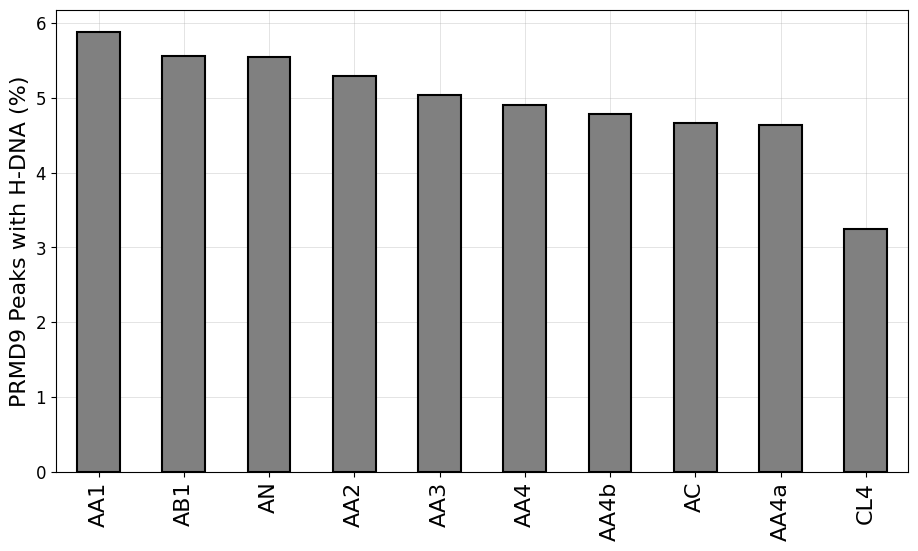

In [395]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 6))

at_least_one.set_index("allele").drop(columns=["0", "1"]).sort_values(by=['H-DNA Presence'], ascending=False).plot(kind="bar", 
                stacked=True, 
                ax=ax,     
                edgecolor='black',                                                                                   
                color='gray',
                linewidth=1.5
            )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.legend(handles=[], frameon=False)
# ax.legend(title='', bbox_to_anchor=(1.01, 0.9), prop={"size": 14})
ax.tick_params(axis="both", labelsize=12)
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('')
ax.yaxis.label.set_size(16)
ax.set_ylabel('PRMD9 Peaks with H-DNA (%)')
ax.set_axisbelow(True)
fig.savefig(f"{figures}/PRMD9_peaks_with_at_least_one.png", bbox_inches='tight')

In [391]:
from collections import defaultdict
from tqdm import tqdm

COVERAGE_FIELDS = ["totalHits", "overlappingBp", "compartmentLength", "coverage"]

# MERGE H-DNA
hdna_bed_merged = hdna_bed.sort().merge()

coverage_df = []
for allele in tqdm(peaks):
    peak = BedTool(peaks[allele]).sort() #.slop(l=100, 
                                         #     r=100, 
                                         #     g="../datasets/genome.txt")
    cov_df = pd.read_table(peak.coverage(hdna_bed_merged).fn,
                           header=None, 
                           names=['seqID', 'start', 'end'] + COVERAGE_FIELDS
                          ).assign(coverage=lambda ds: 1e2 * ds['coverage'])
    cov_df['allele'] = allele
    coverage_df.append(cov_df)

coverage_df = pd.concat(coverage_df)
coverage_df

100%|██████████| 10/10 [00:03<00:00,  2.89it/s]


,seqID,start,end,totalHits,overlappingBp,compartmentLength,coverage,allele
0,chr1,298662,299792,0,0,1130,0.000,AA1
1,chr1,308475,309395,0,0,920,0.000,AA1
2,chr1,337110,338759,1,28,1649,1.698,AA1
3,chr1,357435,358567,0,0,1132,0.000,AA1
4,chr1,362547,363619,0,0,1072,0.000,AA1
...,...,...,...,...,...,...,...,...
15727,chrY,22333026,22333942,0,0,916,0.000,CL4
15728,chrY,22467790,22469182,0,0,1392,0.000,CL4
15729,chrY,22469680,22470821,0,0,1141,0.000,CL4
15730,chrY,22673682,22674538,0,0,856,0.000,CL4


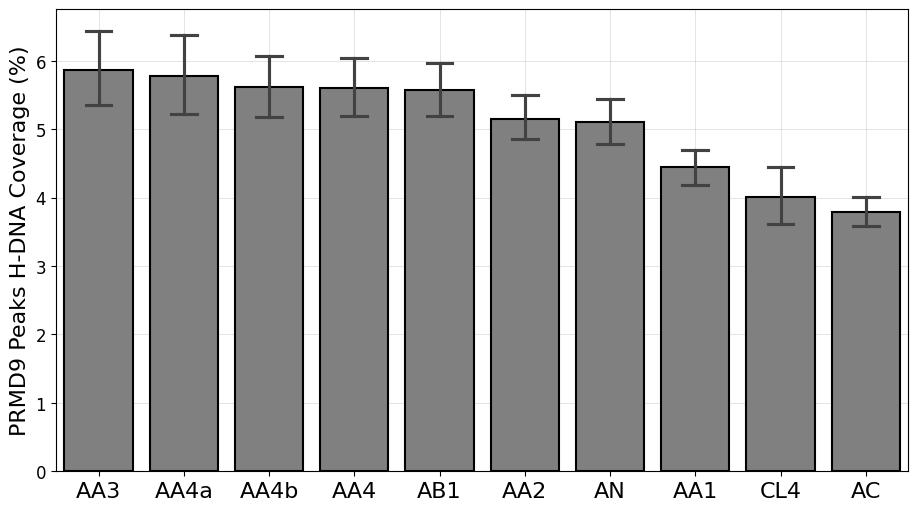

In [398]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 6))

temp = coverage_df.query("coverage > 0")
sns.barplot(data=temp,
            x="allele", 
            y="coverage",
            color="gray",
            linewidth=1.5,
            edgecolor='black',
            capsize=.3,
            order=temp.groupby("allele").agg({"coverage": "mean"}).sort_values(by=['coverage'], ascending=False).index.tolist()
           )

ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.legend(handles=[], frameon=False)
# ax.legend(title='', bbox_to_anchor=(1.01, 0.9), prop={"size": 14})
ax.tick_params(axis="both", labelsize=12)
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('')
ax.yaxis.label.set_size(16)
ax.set_ylabel('PRMD9 Peaks H-DNA Coverage (%)')
ax.set_axisbelow(True)
fig.savefig(f"{figures}/PRMD9_peaks_with_at_least_one_coverage.png", bbox_inches='tight')

## PRMD9 Peak Sites

In [370]:
GFF_PATH = Path("/storage/group/izg5139/default/nicole/datasets/GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz")
genome = pd.read_table("/storage/group/izg5139/default/nicole/datasets/sequence_report.tsv", index_col="RefSeq seq accession")['UCSC style name'].to_dict()
genome

{'NC_060925.1': 'chr1',
 'NC_060926.1': 'chr2',
 'NC_060927.1': 'chr3',
 'NC_060928.1': 'chr4',
 'NC_060929.1': 'chr5',
 'NC_060930.1': 'chr6',
 'NC_060931.1': 'chr7',
 'NC_060932.1': 'chr8',
 'NC_060933.1': 'chr9',
 'NC_060934.1': 'chr10',
 'NC_060935.1': 'chr11',
 'NC_060936.1': 'chr12',
 'NC_060937.1': 'chr13',
 'NC_060938.1': 'chr14',
 'NC_060939.1': 'chr15',
 'NC_060940.1': 'chr16',
 'NC_060941.1': 'chr17',
 'NC_060942.1': 'chr18',
 'NC_060943.1': 'chr19',
 'NC_060944.1': 'chr20',
 'NC_060945.1': 'chr21',
 'NC_060946.1': 'chr22',
 'NC_060947.1': 'chrX',
 'NC_060948.1': 'chrY'}

In [371]:
def load_compartments():
    def _merge_overlaps(compartments, col, col_index):
        comp = compartments[col].unique()
        merged_comp = []
        for c in tqdm(comp):
            temp = pd.read_table(
                BedTool.from_dataframe(compartments[compartments[col] == c]).sort().merge(c=col_index, o="distinct").fn,
                header=None,
                names=['seqID', 'start', 'end', 'compartment'])
            merged_comp.append(temp)
        merged_comp = pd.concat(merged_comp)
        return merged_comp
    
    compartments = pd.read_table("../datasets/chm13v2.0_censat_v2.1.bed", skiprows=1, names=["seqID", "start", "end", "compartment"], header=None, usecols=range(4))
    compartments["compartment"] = compartments["compartment"].apply(lambda x: x.split('_')[0])
    compartments = _merge_overlaps(compartments, "compartment", 4)

    # sva & alu
    sva_df = pd.read_table("datasets/chm13v2.0_SVA.bed", header=None, names=["seqID", "start", "end"], usecols=range(3)).assign(compartment="SVA")
    alu_df = pd.read_table("datasets/chm13v2.0_Alu.bed", header=None, names=["seqID", "start", "end"], usecols=range(3)).assign(compartment="Alu")

    # gff
    gff_df = pd.read_table(GFF_PATH, 
                           comment="#", 
                           header=None,
                           names=["seqID", "source", "compartment", "start", "end"], 
                           usecols=range(5)
                           )
    gff_df['seqID'] = gff_df['seqID'].map(genome)
    gff_df = gff_df[["seqID", "start", "end", "compartment"]]
    gff_df = gff_df.query("compartment == 'gene' | compartment == 'exon' | compartment == 'CDS' | compartment == 'enhancer' | compartment == 'silencer'").copy()
    gff_df = _merge_overlaps(gff_df, "compartment", 4)
    return pd.concat([sva_df, alu_df, compartments, gff_df], axis=0)

compartments_df = load_compartments()
compartments_bed = BedTool.from_dataframe(compartments_df).sort()
compartments_df.head(10)

100%|██████████| 5/5 [00:24<00:00,  4.87s/it]


,seqID,start,end,compartment
0,chr1,33201157,33201208,SVA
1,chr1,203452249,203452293,SVA
2,chr15,15074264,15074335,SVA
3,chr4,3226413,3226603,SVA
4,chr1,157687,157800,SVA
5,chr1,164502,164615,SVA
6,chr1,266063,266144,SVA
7,chr1,816150,816180,SVA
8,chr1,816489,816645,SVA
9,chr1,3448481,3448497,SVA


In [91]:
window_size = 3_000
maker = WindowMaker(base=0, window_size=window_size)

peaks_df = pd.concat([
                    pd.read_table(peak, 
                                    header=None,
                        names=["seqID", "start", "end"]).assign(allele=allele) for allele, peak in peaks.items()],
                     axis=0)\
            .sort_values(by=["seqID", "start"], ascending=True)\
          .reset_index(drop=True)
# peaks_df["start"] = np.maximum(peaks_df["start"] - window_size, 0)
# peaks_df["end"] = peaks_df["end"] + window_size + 1

peaks_df_win = maker.make_windows(peaks_df, loci="mid")
peaks_bed = BedTool.from_dataframe(peaks_df_win).sort()
peaks_df_win

,seqID,start,end,allele
0,chr1,283559,289560,AC
1,chr1,286970,292971,AC
2,chr1,296067,302068,AA2
3,chr1,296023,302024,AA3
4,chr1,296070,302071,AC
...,...,...,...,...
261726,chrY,27294490,27300491,AA4b
261727,chrY,27294499,27300500,AA4
261728,chrY,27294538,27300539,AA4a
261729,chrY,27381001,27387002,AC


### Fischer Test

In [428]:
from scipy.stats import fisher_exact, chi2_contingency

def calculate_fisher_test(global_df, A_df, H_DNA):
    # H-DNA --> rDNA without prmd9 and rDNA with prmd9
    # > rDNA without prmd9
    # Let A = rDNA without prmd9 and 
    # let B = rDNA with prmd9
    #
    # Calculate prmd9 motif in r-DNA that overlaps with H-DNA
    A_df = A_df.rename(columns={"chromosome": "seqID"})
    if "length" not in A_df:
        A_df["length"] = A_df["end"] - A_df["start"]
    total_records = A_df.shape[0]
    A_bed =  BedTool.from_dataframe(A_df[["seqID", "start", "end"]]).sort() #.merge()
    H_DNA = pd.read_table(BedTool.from_dataframe(H_DNA).sort().merge().intersect(A_bed).fn, 
                          header=None, 
                          names=["seqID", "start", "end"])
    H_DNA["length"] = H_DNA["end"] - H_DNA["start"]
    total_HDNA = H_DNA["length"].sum()
    
    HDNA_bed =  BedTool.from_dataframe(H_DNA).sort()
    global_bed = BedTool.from_dataframe(global_df).sort()

    ### Calculate A that overlaps with HDNA
    A_df_with_HDNA = pd.read_table(
                    BedTool.from_dataframe(A_df[["seqID", "start", "end"]])\
                                .sort()\
                                .intersect(HDNA_bed).fn,
                    header=None, 
                    names=["seqID", "start", "end"]
                ).assign(length=lambda ds: ds['end']-ds['start'])
    
    A_with_HDNA = A_df_with_HDNA['length'].sum()
    
    # Calculate B that overlaps with H-DNA
    # We don't know B yet
    # get B by removing A from global
    B_bed = global_bed.subtract(A_bed)
    
    # Now find B that overlaps with H-DNA as we did with A
    B_df_with_HDNA = pd.read_table(
                                B_bed.intersect(HDNA_bed).fn,
                    header=None, 
                    names=["seqID", "start", "end"]
                ).assign(length=lambda ds: ds['end']-ds['start'])
    B_with_HDNA = B_df_with_HDNA['length'].sum()

    # calculate total parent
    global_df["length"] = global_df["end"] - global_df["start"]
    global_bp = global_df["length"].sum()
    

    # Now calculate A without H-DNA
    # Finally, calculate B without H-DNA
    # calculate total prmd9 motif bp in rDNA
    # calcualte total A
    total_A_bp = A_df["length"].sum()
    
    # calculate total B
    total_B_bp = global_bp - total_A_bp
    
    # calculate total rDNA without prmd9 and without H-DNA
    A_without_HDNA = total_A_bp - A_with_HDNA
    B_without_HDNA = total_B_bp - B_with_HDNA

    assert A_with_HDNA + A_without_HDNA == total_A_bp
    assert B_with_HDNA + B_without_HDNA == total_B_bp
    assert A_with_HDNA + A_without_HDNA + B_with_HDNA + B_without_HDNA == total_A_bp + total_B_bp == global_bp
    assert A_with_HDNA + B_with_HDNA == total_HDNA, f"{A_with_HDNA},{B_with_HDNA},{total_HDNA}"
    assert A_without_HDNA + B_without_HDNA == global_bp - total_HDNA

    table_prmd9 = np.array([
                            [A_with_HDNA, B_with_HDNA],
                            [A_without_HDNA, B_without_HDNA]
    ])
    
    return table_prmd9,  chi2_contingency(table_prmd9), total_records

In [429]:
genome = pd.read_table("/storage/group/izg5139/default/nicole/datasets/genome.txt", header=None, 
                      names=["seqID", "end"]).assign(start=0)[["seqID", "start", "end"]]
genome.head()

,seqID,start,end
0,chr1,0,248387328
1,chr2,0,242696752
2,chr3,0,201105948
3,chr4,0,193574945
4,chr5,0,182045439


In [430]:
alleles = peaks_df['allele'].unique()
alleles

array(['AC', 'AA2', 'AA3', 'AA1', 'AB1', 'AA4', 'AA4b', 'AA4a', 'CL4',
       'AN'], dtype=object)

In [431]:
stats = {}
for allele in tqdm(alleles):
    temp = peaks_df[peaks_df['allele'] == allele]
    stats[allele] = calculate_fisher_test(genome, temp, hdna_df)

stats[allele]

100%|██████████| 10/10 [01:49<00:00, 10.98s/it]


(array([[    122438,          0],
        [  37249439, 3079920193]]),
 Chi2ContingencyResult(statistic=10090768.604066752, pvalue=0.0, dof=1, expected_freq=array([[1.46785664e+03, 1.20970143e+05],
        [3.73704091e+07, 3.07979922e+09]])),
 26814)

In [432]:
for allele in stats:
    print(stats[allele][1])

Chi2ContingencyResult(statistic=6149121.829798561, pvalue=0.0, dof=1, expected_freq=array([[3.62165210e+03, 1.47428348e+05],
       [7.47381683e+07, 3.04240285e+09]]))
Chi2ContingencyResult(statistic=9946832.512283148, pvalue=0.0, dof=1, expected_freq=array([[2.81862761e+03, 1.66033372e+05],
       [5.20337904e+07, 3.06508943e+09]]))
Chi2ContingencyResult(statistic=11561541.910396824, pvalue=0.0, dof=1, expected_freq=array([[5.96598374e+02, 8.27534016e+04],
       [2.23121974e+07, 3.09489652e+09]]))
Chi2ContingencyResult(statistic=9246889.562945604, pvalue=0.0, dof=1, expected_freq=array([[2.46452496e+03, 1.49730475e+05],
       [5.04764875e+07, 3.06666339e+09]]))
Chi2ContingencyResult(statistic=11935322.617976746, pvalue=0.0, dof=1, expected_freq=array([[1.69446361e+03, 1.41363536e+05],
       [3.69213575e+07, 3.08022765e+09]]))
Chi2ContingencyResult(statistic=9793411.385818405, pvalue=0.0, dof=1, expected_freq=array([[8.11503164e+02, 8.87424968e+04],
       [2.82468645e+07, 3.0889556

### Compartments PRMD9 Binds at

In [373]:
coverage_prmd9 = pd.read_table(
                            compartments_bed.coverage(
                                BedTool.from_dataframe(peaks_df).slop(l=250, r=250, g="../datasets/genome.txt").sort()).fn,
                            header=None,
                            names=compartments_df.columns.tolist() + COVERAGE_FIELDS
)
coverage_prmd9

,seqID,start,end,compartment,totalHits,overlappingBp,compartmentLength,coverage
0,chr1,7506,12982,exon,0,0,5476,0.0
1,chr1,7506,138480,gene,0,0,130974,0.0
2,chr1,12273,12571,Alu,0,0,298,0.0
3,chr1,13445,13584,exon,0,0,139,0.0
4,chr1,15892,16178,Alu,0,0,286,0.0
...,...,...,...,...,...,...,...,...
1845055,chrY,62448967,62450563,exon,0,0,1596,0.0
1845056,chrY,62448967,62449100,CDS,0,0,133,0.0
1845057,chrY,62451063,62451171,exon,0,0,108,0.0
1845058,chrY,62451557,62451910,exon,0,0,353,0.0


In [375]:
coverage_prmd9.query("compartment == 'enhancer'")

,seqID,start,end,compartment,totalHits,overlappingBp,compartmentLength,coverage
18,chr1,44029,44558,enhancer,0,0,529,0.0
44,chr1,123296,123807,enhancer,0,0,511,0.0
151,chr1,204888,205457,enhancer,0,0,569,0.0
164,chr1,219202,220156,enhancer,0,0,954,0.0
165,chr1,220188,220754,enhancer,0,0,566,0.0
...,...,...,...,...,...,...,...,...
1844885,chrY,62080839,62081381,enhancer,0,0,542,0.0
1844886,chrY,62082583,62083084,enhancer,0,0,501,0.0
1844887,chrY,62086109,62086608,enhancer,0,0,499,0.0
1844975,chrY,62332804,62333355,enhancer,0,0,551,0.0


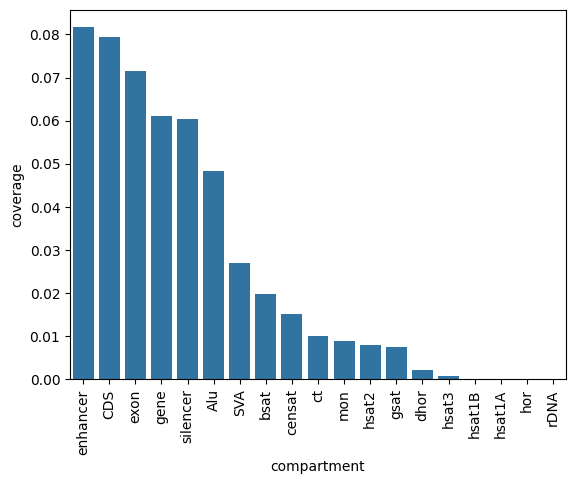

In [374]:
sns.barplot(data=coverage_prmd9.groupby("compartment", as_index=False).agg({"overlappingBp": "sum", 
                                                                "compartmentLength": "sum", 
                                                                "coverage": "mean"})\
            # .assign(coverage=lambda ds: ds['overlappingBp'].div(ds['compartmentLength']))
            .sort_values(by=['coverage'], ascending=False), 
            x="compartment", 
            y="coverage")
plt.gca().tick_params(axis="x", rotation=90)

In [376]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define a third-degree polynomial function
def poly3(x, b, c, d, e, f):
    return b * x ** 4 + c * x ** 3 + d * x ** 2 + e * x + f

In [95]:
g4_bed = BedTool.from_dataframe(g4_df[["seqID", "start", "end", "sequence"]]).sort().merge()
g4_bed.head()

chr1	0	1362
 chr1	1368	1539
 chr1	1543	1629
 chr1	1640	1877
 chr1	1929	1974
 chr1	1978	2017
 chr1	2021	2095
 chr1	2099	2156
 chr1	2159	2204
 chr1	2256	2329
 

In [96]:
g4_bed = BedTool.from_dataframe(g4_df[["seqID", "start", "end", "sequence"]]).sort().merge()
intersect_g4_df = pd.read_table(
                    peaks_bed.intersect(g4_bed, wo=True).fn,
                    header=None,
                    names=peaks_df.columns.tolist() + ["chrom", "motif_start", "motif_end", "overlap"]
)

intersect_g4_df["mid"] = intersect_g4_df["start"] + window_size # + intersect_df["end"]) // 2
intersect_g4_df["distance"] = np.minimum( abs(intersect_g4_df["motif_start"] - intersect_g4_df["mid"]), 
                                      abs(intersect_g4_df["motif_end"] -1 - intersect_g4_df["mid"])
                                      )
print(intersect_g4_df.drop_duplicates(subset=peaks_df.columns.tolist()).allele.value_counts())
intersect_g4_df["bin_dist"] = pd.qcut(intersect_g4_df["distance"], 4, labels=False)
intersect_g4_df

allele
AC      41683
AA2     34702
AA1     28671
AB1     24305
AN      24278
AA4     21172
AA4b    18373
AA3     16408
CL4     13942
AA4a    12272
Name: count, dtype: int64


,seqID,start,end,allele,chrom,motif_start,motif_end,overlap,mid,distance,bin_dist
0,chr1,283559,289560,AC,chr1,284828,284856,28,286559,1704,2
1,chr1,283559,289560,AC,chr1,286629,286656,27,286559,70,0
2,chr1,283559,289560,AC,chr1,286707,286742,35,286559,148,0
3,chr1,283559,289560,AC,chr1,287453,287506,53,286559,894,1
4,chr1,286970,292971,AC,chr1,287453,287506,53,289970,2465,3
...,...,...,...,...,...,...,...,...,...,...,...
1238871,chrY,27294585,27300586,AC,chrY,27295958,27295986,28,27297585,1600,2
1238872,chrY,27381001,27387002,AC,chrY,27384661,27384686,25,27384001,660,1
1238873,chrY,27381001,27387002,AC,chrY,27386779,27386806,27,27384001,2778,3
1238874,chrY,27427539,27433540,AC,chrY,27430205,27430238,33,27430539,302,0


In [97]:
intersect_g4_df[intersect_g4_df['overlap'].isna()]

,seqID,start,end,allele,chrom,motif_start,motif_end,overlap,mid,distance,bin_dist


In [98]:
total_hdna = hdna_bed.sort().merge()
total_hdna_c = total_hdna.count()
total_hdna_c

127261

In [99]:
coverage_df = pd.read_table(
                    peaks_bed.coverage(hdna_bed.sort().merge()).fn,
                    header=None,
                    names=peaks_df.columns.tolist() + COVERAGE_FIELDS
)
coverage_df


,seqID,start,end,allele,totalHits,overlappingBp,compartmentLength,coverage
0,chr1,283559,289560,AC,0,0,6001,0.0
1,chr1,286970,292971,AC,0,0,6001,0.0
2,chr1,296023,302024,AA3,0,0,6001,0.0
3,chr1,296067,302068,AA2,0,0,6001,0.0
4,chr1,296070,302071,AC,0,0,6001,0.0
...,...,...,...,...,...,...,...,...
261726,chrY,27294538,27300539,AA4a,0,0,6001,0.0
261727,chrY,27294575,27300576,AA1,0,0,6001,0.0
261728,chrY,27294585,27300586,AC,0,0,6001,0.0
261729,chrY,27381001,27387002,AC,0,0,6001,0.0


In [102]:
coverage_df['at_least'] = (coverage_df['coverage'] > 0).astype(int)
coverage_df.groupby("allele")['totalHits'].mean().sort_values(ascending=False)

allele
AA3     0.323504
AA4a    0.321835
AA4b    0.316574
AB1     0.314797
AA4     0.310189
AN      0.304953
AA2     0.297682
AA1     0.293805
AC      0.260641
CL4     0.249555
Name: totalHits, dtype: float64

In [110]:
total_overlapping

,perc
allele,
AA1,7.186019
AA2,8.511641
AA3,4.279394
AA4,5.380281
AA4a,3.213082
AA4b,4.763439
AB1,6.322440
AC,9.279355
AN,6.162925


In [112]:
from mindi.coverage.pwm_density import PWMExtractor
extractor = PWMExtractor()

from tqdm import tqdm
alleles = list(intersect_df['allele'].unique())
seqID = list(intersect_df['seqID'].unique())

allele_densities = {}

for allele in tqdm(alleles):
    intersect_df_query = intersect_df[intersect_df['allele'] == allele]
    density = np.array(
                        extractor.extract_density(
                            intersect_df_query.assign(strand='+'), 
                            window_size=window_size
                        )
            )
    allele_densities[allele] = density

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:02<00:00,  4.01it/s]


In [113]:
def how_far_away(d):
    if d < 250:
        return '< 250'
    if d < 500:
        return '< 500'
    if d < 1000:
        return '< 1000'
    if d < 1500:
        return '< 1500'
    return '> 1500'
    
    
intersect_df['far_away'] = intersect_df['distance'].map(how_far_away)

In [258]:
flow_alleles = {}

for allele in tqdm(alleles):
    intersect_df_query = BedTool.from_dataframe(intersect_df[intersect_df['allele'] == allele][["seqID", "start", "end", "far_away"]]).sort()
    compartment_count = pd.read_table(
                                intersect_df_query.intersect(compartments_bed, 
                                                             f=0.2, 
                                                             wao=True).fn,
                                header=None,
                                names=["seqID", "start", "end", "far_away"] + ["chrom", "comp_start", "comp_end", "compartment", "overlap"]
                        )
    compartment_count["compartment"] = compartment_count["compartment"].replace(".", "Other")
    percentages = []
    cat = ["< 250", "< 500", "< 1000", "< 1500", "> 1500"]

    for d in cat:
        compartment_count_grp = compartment_count.query(f"far_away == '{d}'").copy()\
                                                 .groupby(["seqID", "start", "end"], as_index=False)\
                                                 .agg(
                                                                comp=("compartment", lambda ds: list(ds.unique()))
                                                             )
        total_items = compartment_count_grp.shape[0]
        compartment_count_grp = compartment_count_grp.explode("comp")\
                                            .groupby("comp")\
                                            .agg(counts=("end", "count"))\
                        .assign(perc=lambda ds: 1e2 * ds['counts'].div(total_items))\
                        .rename(columns={"perc": f"perc_{d}"}).drop(columns=['counts'])
        percentages.append(compartment_count_grp)

    merged_grp = None
    for df in percentages:
        if merged_grp is None:
            merged_grp = df 
        else:
            merged_grp = merged_grp.merge(df, left_index=True, right_index=True, how="outer")
    merged_grp = merged_grp.fillna(0.0)
    flow_alleles.update({allele: merged_grp})
    


100%|██████████| 10/10 [00:12<00:00,  1.30s/it]


In [28]:
## LOAD PEAKS

peaks_df = pd.concat([
    pd.read_table(peak, 
                  header=None,
                  names=["seqID", "start", "end"]
                 ).assign(allele=allele) for allele, peak in peaks.items()],
                axis=0)\
        .sort_values(by=["seqID", "start"], ascending=True).reset_index(drop=True)
peaks_df

,seqID,start,end,allele
0,chr1,285986,287133,AC
1,chr1,289256,290685,AC
2,chr1,298606,299529,AA2
3,chr1,298619,299427,AA3
4,chr1,298622,299518,AC
...,...,...,...,...
261726,chrY,27296811,27298170,AA4b
261727,chrY,27296829,27298170,AA4
261728,chrY,27296963,27298113,AA4a
261729,chrY,27382836,27385167,AC


In [31]:
alleles = peaks_df["allele"].unique()
peaks_merged = []

for allele in tqdm(alleles):
    temp = pd.read_table(
                BedTool.from_dataframe(peaks_df.query(f"allele == '{allele}'")[["seqID", "start", "end", "allele"]])\
                            .sort()\
                            .merge(c="4", o="distinct").fn,
                    header=None,
                    names=["seqID", "start", "end", "allele"]
    )
    peaks_merged.append(temp)
    
peaks_merged = pd.concat(peaks_merged, axis=0)
peaks_merged

100%|██████████| 10/10 [00:02<00:00,  3.65it/s]


,seqID,start,end,allele
0,chr1,285986,287133,AC
1,chr1,289256,290685,AC
2,chr1,298622,299518,AC
3,chr1,307020,307911,AC
4,chr1,317899,319038,AC
...,...,...,...,...
26809,chrY,22657313,22658431,AN
26810,chrY,22666452,22667292,AN
26811,chrY,22678508,22679880,AN
26812,chrY,27260720,27262405,AN


In [32]:
peaks_df.shape, peaks_merged.shape

((261731, 4), (261728, 4))

In [30]:
window_size = 3000
alleles = peaks_df['allele'].unique()

maker = WindowMaker(base=0, window_size=window_size)
# peaks_df["start"] = np.maximum(peaks_df["start"] - window_size, 0)
# peaks_df["end"] = peaks_df["end"] + window_size + 1

# EXPAND 3000bp WINDOW FROM THE MID OF THE PEAK
peaks_df_win = maker.make_windows(peaks_df, loci="mid")

# MARK THE [-250, 250] WINDOW
peaks_df_win["250_start"] = peaks_df_win["start"] + window_size - 250
peaks_df_win["250_end"] = peaks_df_win["start"] + window_size + 250 + 1


# MARK the [-3000, -250) U (250, 3000] WINDOW
# LEFT
peaks_df_win["3000_start_l"] = peaks_df_win["start"]
peaks_df_win["3000_end_l"] = peaks_df_win["250_start"]

# RIGHT
peaks_df_win["3000_start_r"] = peaks_df_win["250_end"]
peaks_df_win["3000_end_r"] = peaks_df_win["end"]

peaks_df_win

,seqID,start,end,allele,250_start,250_end,3000_start_l,3000_end_l,3000_start_r,3000_end_r
0,chr1,283559,289560,AC,286309,286810,283559,286309,286810,289560
1,chr1,286970,292971,AC,289720,290221,286970,289720,290221,292971
2,chr1,296067,302068,AA2,298817,299318,296067,298817,299318,302068
3,chr1,296023,302024,AA3,298773,299274,296023,298773,299274,302024
4,chr1,296070,302071,AC,298820,299321,296070,298820,299321,302071
...,...,...,...,...,...,...,...,...,...,...
261726,chrY,27294490,27300491,AA4b,27297240,27297741,27294490,27297240,27297741,27300491
261727,chrY,27294499,27300500,AA4,27297249,27297750,27294499,27297249,27297750,27300500
261728,chrY,27294538,27300539,AA4a,27297288,27297789,27294538,27297288,27297789,27300539
261729,chrY,27381001,27387002,AC,27383751,27384252,27381001,27383751,27384252,27387002


In [42]:
# COVERAGE WITHIN 250bp WINDOW

cov_df_250bp = pd.read_table(
                BedTool.from_dataframe(peaks_df_win[["seqID", "250_start", "250_end", "allele"]]).sort().coverage(hdna_bed).fn,
                header=None,
                names=['seqID', 'start', 'end', 'allele'] + COVERAGE_FIELDS
        ).rename(columns={"coverage": "coverage_250", 
                          "compartmentLength": "compartmentLength_250", 
                          "overlappingBp": "overlappingBp_250",
                          "totalHits": "totalHits_250"})

# COVERAGE WITHIN 3000bp WINDOW [-3000, -250) bp on the LEFT (upstream)
cov_df_3000bp_l = pd.read_table(
                BedTool.from_dataframe(peaks_df_win[["seqID", 
                                                     "3000_start_l", 
                                                     "3000_end_l", "allele"]])\
                                .sort()\
                                .coverage(hdna_bed).fn,
                header=None,
                names=['seqID', 'start', 'end', 'allele'] + COVERAGE_FIELDS
        ).drop(columns=['seqID', 'start', 'end', 'allele'])\
         .rename(columns={"coverage": "coverage_3000_l", 
                          "compartmentLength": "compartmentLength_3000_l", 
                          "overlappingBp": "overlappingBp_3000_l",
                          "totalHits": "totalHits_3000_l"})

# COVERAGE WITHIN 3000bp WINDOW (250, 3000] bp on the RIGHT (downstream)
cov_df_3000bp_r = pd.read_table(
                BedTool.from_dataframe(peaks_df_win[["seqID", "3000_start_r", "3000_end_r", "allele"]])\
                                .sort()\
                                .coverage(hdna_bed).fn,
                header=None,
                names=['seqID', 'start', 'end', 'allele'] + COVERAGE_FIELDS
        ).drop(columns=['seqID', 'start', 'end', 'allele'])\
         .rename(columns={"coverage": "coverage_3000_r", 
                          "compartmentLength": "compartmentLength_3000_r", 
                          "overlappingBp": "overlappingBp_3000_r",
                          "totalHits": "totalHits_3000_r",
                            })

# CONCATENATE EVERYTHING
cov_df_all = pd.concat([
                    cov_df_250bp,
                    cov_df_3000bp_l,
                    cov_df_3000bp_r,
], axis=1)
cov_df_all["coverage_3000"] = (cov_df_all["overlappingBp_3000_l"] + cov_df_all["overlappingBp_3000_r"]) / (window_size - 501)
cov_df_all

,seqID,start,end,allele,totalHits_250,overlappingBp_250,compartmentLength_250,coverage_250,totalHits_3000_l,overlappingBp_3000_l,compartmentLength_3000_l,coverage_3000_l,totalHits_3000_r,overlappingBp_3000_r,compartmentLength_3000_r,coverage_3000_r,coverage_3000
0,chr1,286309,286810,AC,0,0,501,0.0,0,0,2750,0.0,0,0,2750,0.0,0.0
1,chr1,289720,290221,AC,0,0,501,0.0,0,0,2750,0.0,0,0,2750,0.0,0.0
2,chr1,298773,299274,AA3,0,0,501,0.0,0,0,2750,0.0,0,0,2750,0.0,0.0
3,chr1,298817,299318,AA2,0,0,501,0.0,0,0,2750,0.0,0,0,2750,0.0,0.0
4,chr1,298820,299321,AC,0,0,501,0.0,0,0,2750,0.0,0,0,2750,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261726,chrY,27297288,27297789,AA4a,0,0,501,0.0,0,0,2750,0.0,0,0,2750,0.0,0.0
261727,chrY,27297325,27297826,AA1,0,0,501,0.0,0,0,2750,0.0,0,0,2750,0.0,0.0
261728,chrY,27297335,27297836,AC,0,0,501,0.0,0,0,2750,0.0,0,0,2750,0.0,0.0
261729,chrY,27383751,27384252,AC,0,0,501,0.0,0,0,2750,0.0,0,0,2750,0.0,0.0


In [58]:
enrichments = {}

for allele in cov_df_all['allele'].unique():
    print(allele)
    chunk = cov_df_all.query(f"allele == '{allele}'")
    HDNA_coverage_250 = chunk["overlappingBp_250"].sum() / chunk["compartmentLength_250"].sum()
    HDNA_coverage_3000 = (chunk["overlappingBp_3000_l"].sum() + chunk["overlappingBp_3000_r"].sum()) / (chunk["compartmentLength_3000_l"].sum() + chunk["compartmentLength_3000_r"].sum())
    
    HDNA_enrichment = HDNA_coverage_250 / HDNA_coverage_3000
    enrichments.update({allele: HDNA_enrichment})

enrichment_HDNA_allele = pd.Series(enrichments)
enrichment_HDNA_allele.sort_values(ascending=False, inplace=True)
colors_df = enrichment_HDNA_allele.apply(lambda x: sns.color_palette("Set2")[4] if x > 1.0 else "gray").to_dict()

enrichment_HDNA_allele = enrichment_HDNA_allele.to_frame(name='Fold Enrichment')\
                        .reset_index()\
                        .rename(columns={"index": "allele"})
enrichment_HDNA_allele

AC
AA3
AA2
AB1
AA4
AA1
AA4b
AA4a
CL4
AN


,allele,Fold Enrichment
0,AB1,2.162772
1,AN,2.088881
2,AA1,2.012164
3,AA2,1.911243
4,AA3,1.831914
5,AA4,1.795417
6,AA4b,1.716386
7,AA4a,1.551414
8,AC,1.174775
9,CL4,0.699076


In [44]:
cov_df_all["coverage_3000"] = (cov_df_all["overlappingBp_3000_l"] + cov_df_all["overlappingBp_3000_r"]) / (window_size - 501)

In [45]:
cov_df_all["coverage_250"].mean(), (cov_df_all["coverage_3000_r"] + cov_df_all["coverage_3000_l"]).mean(), cov_df_all["coverage_3000"].mean()

(0.0032854503910503528, 0.0037965142394290326, 0.004177836739840149)

In [55]:
from scipy.stats import mannwhitneyu

In [64]:
significant = defaultdict(list)
for allele in alleles:
    t, pval = mannwhitneyu(cov_df_all[cov_df_all.allele == allele]['coverage_3000_r'],
                           cov_df_all[cov_df_all.allele == allele]['coverage_250'], 
                        alternative='less'
                )
    print(allele, pval)
    significant["allele"].append(allele)
    significant["pval"].append(pval)

significant = pd.DataFrame(significant)
significant

AC 1.0
AA2 1.0
AA3 1.0
AA1 1.0
AB1 1.0
AA4 1.0
AA4b 1.0
AA4a 1.0
CL4 1.0
AN 1.0


,allele,pval
0,AC,1.0
1,AA2,1.0
2,AA3,1.0
3,AA1,1.0
4,AB1,1.0
5,AA4,1.0
6,AA4b,1.0
7,AA4a,1.0
8,CL4,1.0
9,AN,1.0


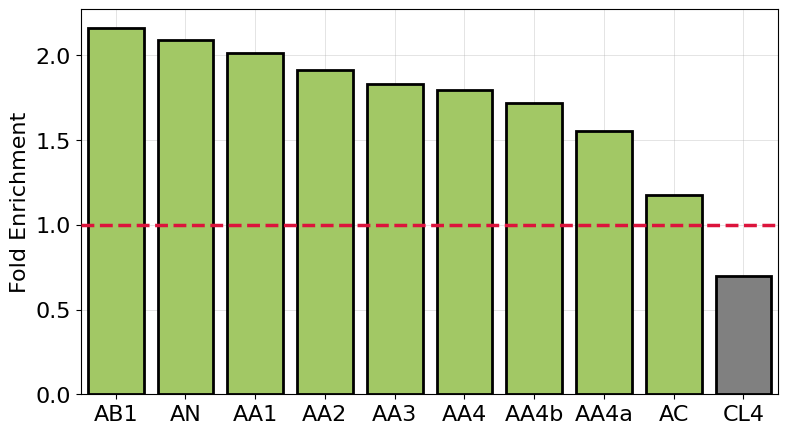

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 5))
sns.barplot(
    data=enrichment_HDNA_allele, 
            x='allele', 
            hue='allele', 
            y='Fold Enrichment', 
            ax=ax,
            zorder=3,
            edgecolor='black',
            lw=2.0,
            palette=colors_df
           )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xlabel('')
ax.tick_params(axis="both", labelsize=16, zorder=0)
ax.set_ylabel('Fold Enrichment')
ax.axhline(1.0, linestyle='--', lw=2.5, zorder=3, color="crimson")
ax.yaxis.label.set_size(16)

## Densities

In [102]:
window_size = 3000
alleles = peaks_df['allele'].unique()

maker = WindowMaker(base=0, window_size=window_size)
# peaks_df["start"] = np.maximum(peaks_df["start"] - window_size, 0)
# peaks_df["end"] = peaks_df["end"] + window_size + 1

# EXPAND 3000bp WINDOW FROM THE MID OF THE PEAK
peaks_df_win = maker.make_windows(peaks_df, loci="mid")

In [103]:
peaks_bed = BedTool.from_dataframe(peaks_df_win).sort()
peaks_bed.head()

chr1	283559	289560	AC
 chr1	286970	292971	AC
 chr1	296023	302024	AA3
 chr1	296067	302068	AA2
 chr1	296070	302071	AC
 chr1	296204	302205	AB1
 chr1	296215	302216	AA4
 chr1	296227	302228	AA1
 chr1	296232	302233	AA4b
 chr1	296252	302253	AA4a
 

In [104]:
total_hdna_c = hdna_bed.sort().merge().count()
total_hdna_c

123604

In [105]:
intersect_df = pd.read_table(
                    peaks_bed.intersect(hdna_bed.sort(), wo=True).fn,
                    header=None,
                    names=peaks_df.columns.tolist() + ["chrom", "motif_start", "motif_end", "overlap"]
)

intersect_df["mid"] = intersect_df["start"] + window_size # + intersect_df["end"]) // 2
intersect_df["distance"] = np.minimum(abs(intersect_df["motif_start"] - intersect_df["mid"]), 
                                      abs(intersect_df["motif_end"] -1 - intersect_df["mid"])
                                      )

total_overlapping = intersect_df\
                        .drop_duplicates(subset=['allele', 'chrom', 'motif_start', 'motif_end'])\
                        .groupby(["allele"])\
                        .agg(perc=("seqID", lambda ds: 1e2 * ds.count() / total_hdna_c))

perc_grp = {}
for d in [250, 500, 1000, 1500, 2000, 3000, 4000, 5000]:
    overlap = intersect_df.query(f"distance <= {d}")\
                        .drop_duplicates(subset=['allele', 'chrom', 'motif_start', 'motif_end'])\
                        .groupby(["allele"])\
                        .agg(perc=("seqID", lambda ds: 1e2 * ds.count() / total_hdna_c)).rename(columns={"perc": f'perc_<{d}'})
    perc_grp.update({d: overlap})

grp = None
for d, overlap in perc_grp.items():
    if grp is None:
        grp = overlap
    else:
        grp = grp.merge(overlap, 
                        left_index=True, 
                        right_index=True, 
                        how="outer")

print(intersect_df.drop_duplicates(subset=peaks_df.columns.tolist()).allele.value_counts())
intersect_df["bin_dist"] = pd.qcut(intersect_df["distance"], 4, labels=False)
intersect_df

allele
AC      7400
AA2     6324
AA1     5298
AB1     4546
AN      4492
AA4     3875
AA4b    3384
AA3     2990
CL4     2357
AA4a    2227
Name: count, dtype: int64


,seqID,start,end,allele,chrom,motif_start,motif_end,overlap,mid,distance,bin_dist
0,chr1,315304,321305,CL4,chr1,318296,318323,27,318304,8,0
1,chr1,315304,321305,CL4,chr1,318598,318623,25,318304,294,0
2,chr1,315468,321469,AC,chr1,318296,318323,27,318468,146,0
3,chr1,315468,321469,AC,chr1,318598,318623,25,318468,130,0
4,chr1,334599,340600,AC,chr1,338667,338695,28,337599,1068,1
...,...,...,...,...,...,...,...,...,...,...,...
75418,chrY,22342546,22348547,AA3,chrY,22348201,22348228,27,22345546,2655,3
75419,chrY,22342557,22348558,AA4,chrY,22348201,22348228,27,22345557,2644,3
75420,chrY,22342589,22348590,AA1,chrY,22348201,22348228,27,22345589,2612,3
75421,chrY,22342597,22348598,AB1,chrY,22348201,22348228,27,22345597,2604,3


In [309]:
hdna_bed.head()

chr1	50042	50071	ggagggagggaggcagaaagggagggagg
 chr1	50059	50086	aagggagggaggcagaaagggagggaa
 chr1	50082	50111	ggaaggaaggagcaaggaaggaaggaagg
 chr1	50095	50117	aaggaaggaaggaaggaaggaa
 chr1	50097	50119	ggaaggaaggaaggaaggaagg
 chr1	73360	73386	gaaagaaagaagagagagaaagaaag
 chr1	73390	73429	agaaagaaaaagaaagaaagaaagaaagaaaaagaaaga
 chr1	73398	73451	aaagaaagaaagaaagaaagaaaaagaaagaaagaaagaaagaaagaaagaaa
 chr1	73420	73463	aaagaaagaaagaaagaaagaaagaaagaaagaaagaaagaaa
 chr1	73422	73465	agaaagaaagaaagaaagaaagaaagaaagaaagaaagaaaga
 

In [407]:
from Bio.Seq import Seq

intersect_df = pd.read_table(
                    peaks_bed.intersect(hdna_bed.sort(), wo=True).fn,
                    header=None,
                    names=peaks_df.columns.tolist() + ["chrom", "motif_start", "motif_end", "sequence", "overlap"]
)

def complement(seq):
    ga = seq.count("g") + seq.count("a")
    length = len(seq)
    if ga / length < 0.5:
        seq = str(Seq(seq).reverse_complement())
    return seq

intersect_df['sequence'] = intersect_df['sequence'].apply(complement)

intersect_df["mid"] = intersect_df["start"] + window_size # + intersect_df["end"]) // 2
intersect_df["distance"] = np.minimum(abs(intersect_df["motif_start"] - intersect_df["mid"]), 
                                      abs(intersect_df["motif_end"] -1 - intersect_df["mid"])
                                      )

# total_overlapping = intersect_df\
#                         .drop_duplicates(subset=['allele', 'chrom', 'motif_start', 'motif_end'])\
#                         .groupby(["allele"])\
#                         .agg(perc=("seqID", lambda ds: 1e2 * ds.count() / total_hdna_c))

# perc_grp = {}
# for d in [250, 500, 1000, 1500, 2000, 3000, 4000, 5000]:
#     overlap = intersect_df.query(f"distance <= {d}")\
#                         .drop_duplicates(subset=['allele', 'chrom', 'motif_start', 'motif_end'])\
#                         .groupby(["allele"])\
#                         .agg(perc=("seqID", lambda ds: 1e2 * ds.count() / total_hdna_c)).rename(columns={"perc": f'perc_<{d}'})
#     perc_grp.update({d: overlap})

# grp = None
# for d, overlap in perc_grp.items():
#     if grp is None:
#         grp = overlap
#     else:
#         grp = grp.merge(overlap, 
#                         left_index=True, 
#                         right_index=True, 
#                         how="outer")

# print(intersect_df.drop_duplicates(subset=peaks_df.columns.tolist()).allele.value_counts())
# intersect_df["bin_dist"] = pd.qcut(intersect_df["distance"], 4, labels=False)
# intersect_df
intersect_df

,seqID,start,end,allele,chrom,motif_start,motif_end,sequence,overlap,mid,distance
0,chr1,315304,321305,CL4,chr1,318296,318323,aggaaggaaggaaggaagaaggaagga,27,318304,8
1,chr1,315304,321305,CL4,chr1,318598,318623,agggagggagagagggagggaggga,25,318304,294
2,chr1,315468,321469,AC,chr1,318296,318323,aggaaggaaggaaggaagaaggaagga,27,318468,146
3,chr1,315468,321469,AC,chr1,318598,318623,agggagggagagagggagggaggga,25,318468,130
4,chr1,334599,340600,AC,chr1,338667,338695,aggggagtagggggaggggatgagggga,28,337599,1068
...,...,...,...,...,...,...,...,...,...,...,...
156716,chrY,22342546,22348547,AA3,chrY,22348201,22348228,agggaaggaaagaaacaaaggaaggga,27,22345546,2655
156717,chrY,22342557,22348558,AA4,chrY,22348201,22348228,agggaaggaaagaaacaaaggaaggga,27,22345557,2644
156718,chrY,22342589,22348590,AA1,chrY,22348201,22348228,agggaaggaaagaaacaaaggaaggga,27,22345589,2612
156719,chrY,22342597,22348598,AB1,chrY,22348201,22348228,agggaaggaaagaaacaaaggaaggga,27,22345597,2604


In [414]:
from collections import Counter

for allele in alleles:
    print(allele)
    print(Counter(intersect_df.query(f"distance < 250 & allele == '{allele}'")['sequence']).most_common(5))

CL4
[('agagagagagagagagagaga', 7), ('agagagagagagagagagagaga', 4), ('aggaaggaaggaaggaagga', 4), ('agggagggagggagggaggga', 3), ('agagagagagagagagagagagagagagagagagagagagaga', 3)]
AC
[('agagagagagagagagagaga', 24), ('aggaaggaaggaaggaagga', 20), ('gagagagagagagagagagag', 16), ('gaaggaaggaaggaaggaag', 16), ('agagagagagagagagagagaga', 16)]
AN
[('aggaaggaaggaaggaagga', 23), ('ggagggagggagggagggagg', 19), ('agggagggagggagggaggga', 19), ('gaaggaaggaaggaaggaag', 16), ('ggaaggaaggagggaaggaagg', 14)]
AA4b
[('ggaaggaaggagggaaggaagg', 17), ('aggaaggaaggaaggaagga', 16), ('agagagagagagagagagaga', 13), ('gaaggaaggaaggaaggaag', 13), ('agggagggagggagggaggga', 12)]
AA4
[('aggaaggaaggaaggaagga', 20), ('ggaaggaaggagggaaggaagg', 17), ('ggagggagggagggagggagg', 14), ('agagagagagagagagagaga', 12), ('gaaggaaggaaggaaggaag', 12)]
AA2
[('aggaaggaaggaaggaagga', 31), ('agggagggagggagggaggga', 28), ('agagagagagagagagagaga', 23), ('ggagggagggagggagggagg', 23), ('gaaggaaggaaggaaggaag', 20)]
AA4a
[('ggaaggaaggagggaaggaa

In [285]:
def bootstrap_bins(df, N=1_000, window_size=3000):
    extractor = PWMExtractor()
    densities = []
    for _ in range(N):
        sample = df.sample(frac=1.0, replace=True)
        density = np.array(
                        extractor.extract_density(
                            sample.assign(strand='+'), 
                            window_size=window_size
                        )
            )
        density = density / np.mean(density)
        densities.append(density)

    densities = pd.DataFrame(densities)
    avg = densities.mean()
    ci_975 = densities.quantile(0.975)
    ci_025 = densities.quantile(0.025)
    return avg, ci_025, ci_975

In [246]:
from mindi.coverage.pwm_density import PWMExtractor
extractor = PWMExtractor()

alleles = list(intersect_df['allele'].unique())
seqID = list(intersect_df['seqID'].unique())

allele_densities = {}

for allele in alleles:
    intersect_df_query = intersect_df[intersect_df['allele'] == allele]
    density = np.array(
                        extractor.extract_density(
                            intersect_df_query.assign(strand='+'), 
                            window_size=window_size
                        )
            )
    allele_densities[allele] = density

In [303]:
alleles

['CL4', 'AC', 'AN', 'AA4b', 'AA4', 'AA2', 'AA4a', 'AA1', 'AB1', 'AA3']

In [405]:
intersect_df_query.query("distance < 25")

,seqID,start,end,allele,chrom,motif_start,motif_end,sequence,overlap,mid,distance
1472,chr1,2357539,2363540,AA3,chr1,2360466,2360528,aggaaggagggaggaaggagggaggaagaggaaggaaggagggagg...,62,2360539,12
1473,chr1,2357539,2363540,AA3,chr1,2360498,2360550,aggaaggagggaggaaggagggaggaaggagggaggaaggagggag...,52,2360539,10
1474,chr1,2357539,2363540,AA3,chr1,2360501,2360558,aaggagggaggaaggagggaggaaggagggaggaaggagggaggaa...,57,2360539,18
2230,chr1,5267178,5273179,AA3,chr1,5270127,5270158,gagggagggagggaaggaaggagggagggag,31,5270178,21
2231,chr1,5267178,5273179,AA3,chr1,5270181,5270206,agggagggaggaatggagggaggga,25,5270178,3
...,...,...,...,...,...,...,...,...,...,...,...
153149,chrX,144062884,144068885,AA3,chrX,144065825,144065869,ggaggaggaggaggaggaggaggaggaggaggaggaggaggagg,44,144065884,16
154529,chrX,152206036,152212037,AA3,chrX,152209029,152209052,gggggcgggggagggggcggggg,23,152209036,7
154974,chrY,1327280,1333281,AA3,chrY,1330237,1330259,ccttccttccttccttccttcc,22,1330280,22
155408,chrY,7449411,7455412,AA3,chrY,7452432,7452454,ccctcccctcccctcccctccc,22,7452411,21


CL4


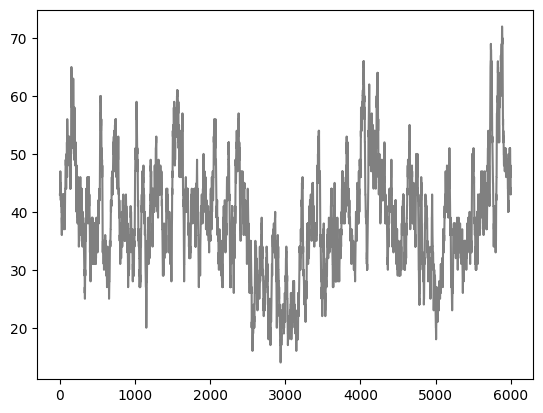

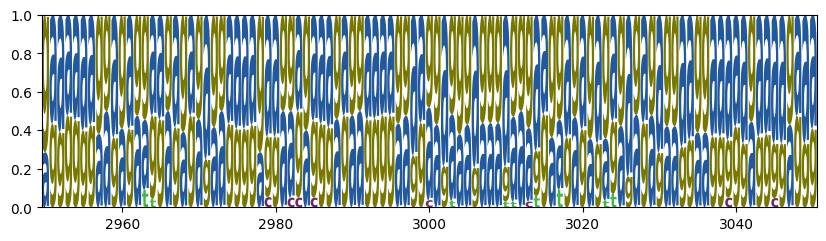

AC


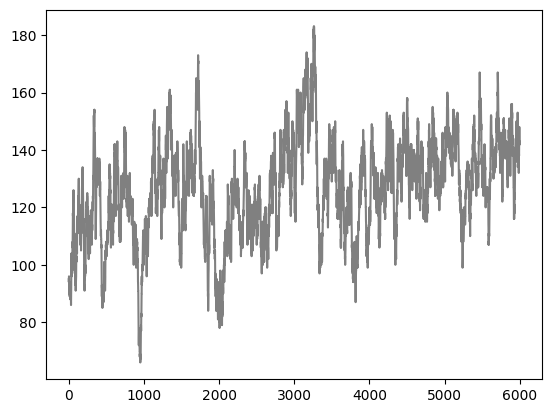

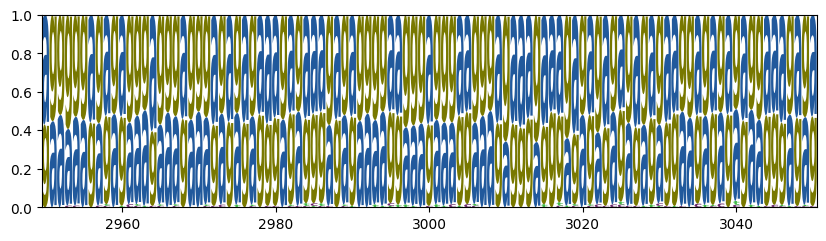

AN


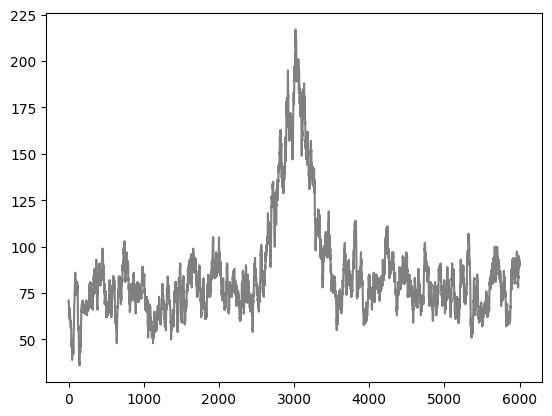

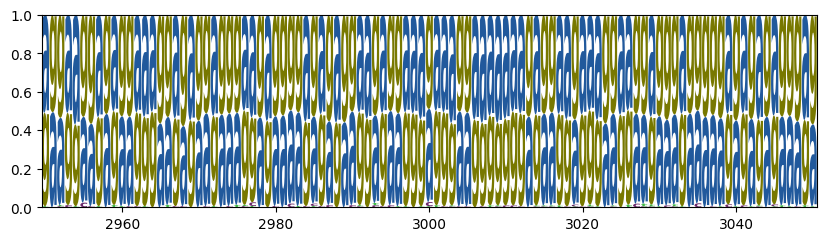

AA4b


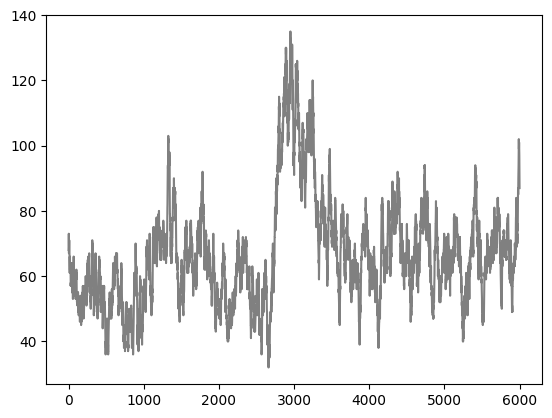

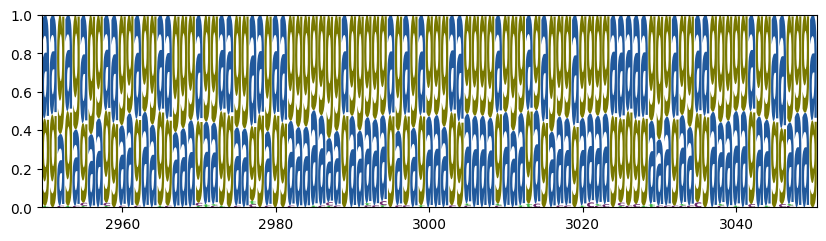

AA4


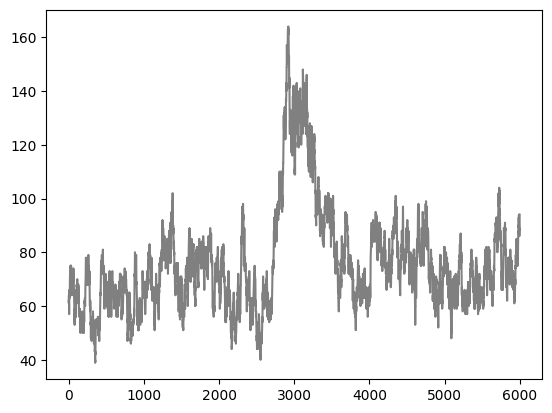

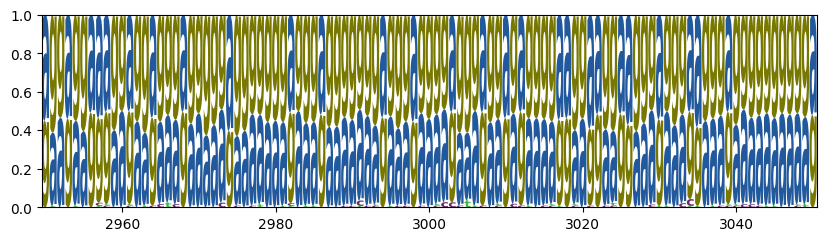

AA2


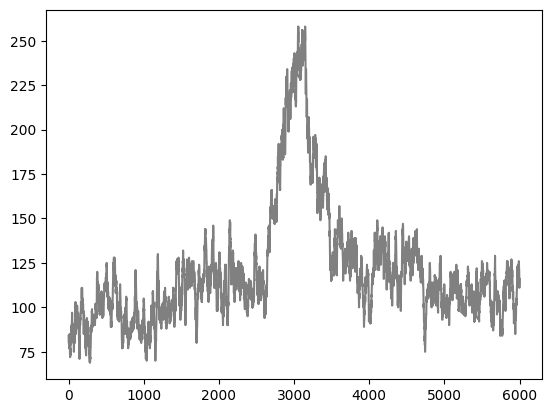

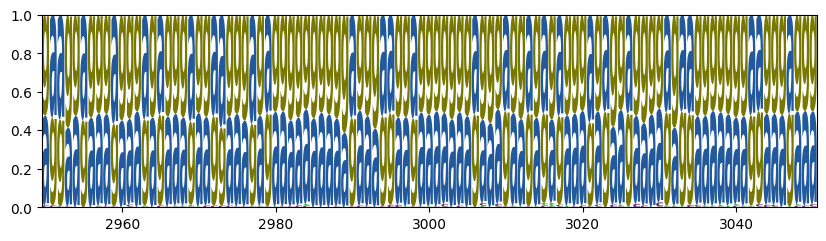

AA4a


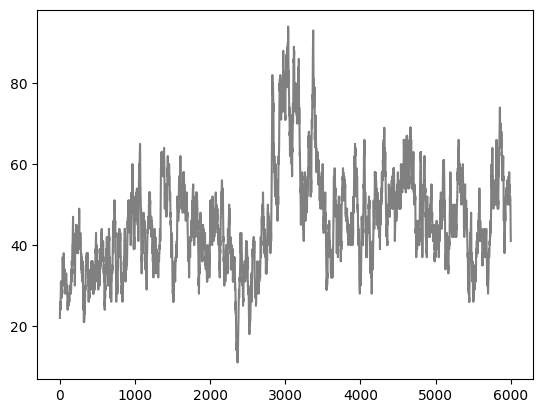

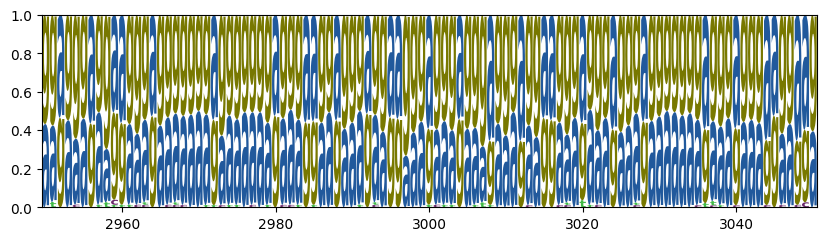

AA1


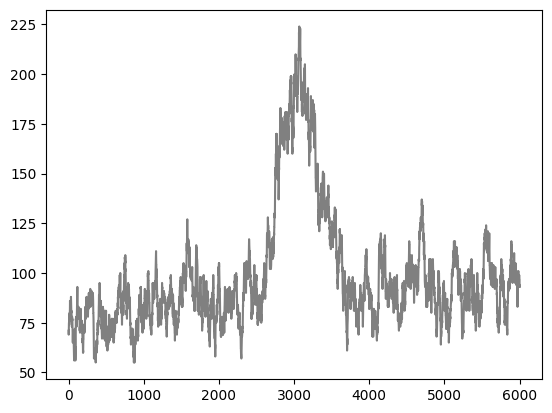

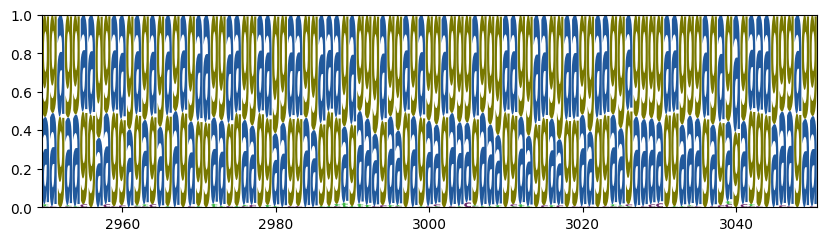

AB1


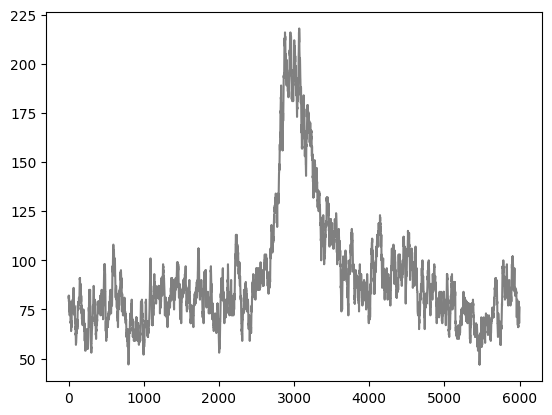

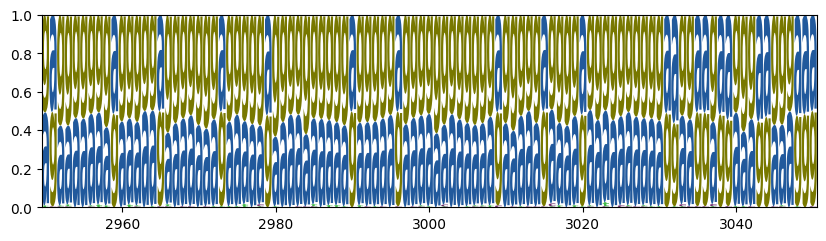

AA3


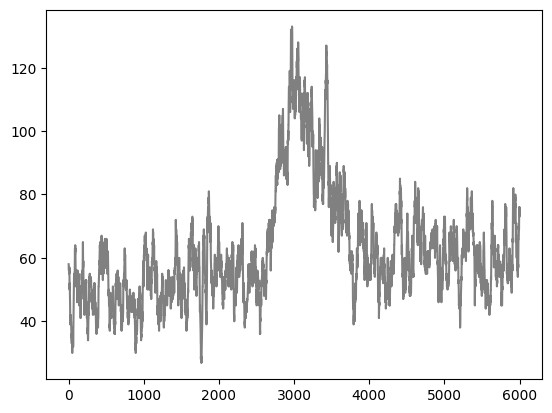

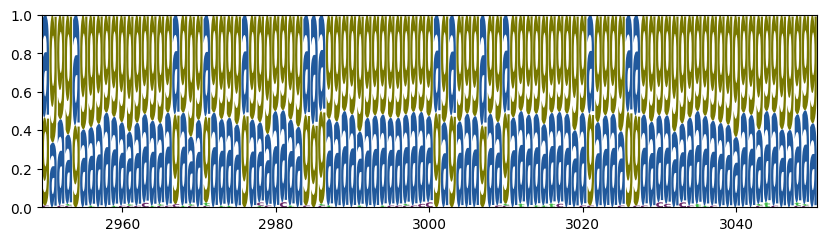

In [417]:
from mindi.coverage.pwm_density import PWMExtractor
extractor = PWMExtractor()

alleles = list(intersect_df['allele'].unique())
chromosomes = list(intersect_df['seqID'].unique())
allele_seq_densities = {}

for allele in alleles:
    intersect_df_query = intersect_df[intersect_df['allele'] == allele]
    density = extractor.extract_PWM(
                            intersect_df_query.assign(strand='+'), 
                            window_size=window_size
                        )
    allele_seq_densities[allele] = density
    # plt.plot(range(-window_size, window_size+1), density / np.mean(density))
    # plt.title(seqID)
    # plt.show()
    print(allele)
    # plt.close()
    density = pd.DataFrame(density)
    plt.plot(density.sum(axis=1), color='gray', label=allele)
        
    try:
        crp_logo = logomaker.Logo(density.apply(lambda row: row / row.sum(), axis=1).loc[2950: 3050, :],
                          shade_below=.5,
                          fade_below=.5,
                          # vpad=.05,
                          # fade_probabilities=True,
                         #stack_order='small_on_top',
                         color_scheme='NajafabadiEtAl2017', 
                        #'dodgerblue',
                        # color_scheme='skylign_protein'
                        # width=.7
                    )
    except Exception:
        continue
    plt.show()
    plt.close()

In [247]:
from mindi.coverage.pwm_density import PWMExtractor
extractor = PWMExtractor()

alleles = list(intersect_df['allele'].unique())
seqID = list(intersect_df['seqID'].unique())

allele_densities_bootstrap = {}

for allele in tqdm(alleles):
    intersect_df_query = intersect_df[intersect_df['allele'] == allele]
    avg, ci_025, ci_975 = bootstrap(intersect_df_query, 
                                    N=10, 
                                    window_size=window_size
                                   )
    allele_densities_bootstrap[allele] = avg, ci_025, ci_975

100%|██████████| 10/10 [01:09<00:00,  6.96s/it]


### Base pair at which maximum Enrichment is Achieved (per allele)

In [459]:
density

array([0.82771421, 0.80972042, 0.80972042, ..., 1.07962723, 1.06163344,
       1.09762102])

In [467]:
maximum_250bp = {}

for allele in alleles:
    density = allele_densities[allele]
    mean = np.mean(density)
    density = density / mean # [window_size - 250: window_size + 251]
    density = np.array([i if (j >= 2950 and j <= 3050) else -float('inf') for j, i in enumerate(density)])
    maximum_250bp.update({allele: (np.argmax(density) - window_size, np.max(density))})
    
maximum_250bp = pd.Series(maximum_250bp)\
                    .apply(pd.Series)\
                    .rename(columns={0: "bp", 
                                     1: "Enrichment"})\
                    .astype({"bp": int})\
                    .sort_values(by=['Enrichment'], ascending=False)
maximum_250bp

,bp,Enrichment
AN,19,2.681074
AA3,-42,2.357720
AB1,-50,2.355753
AA2,37,2.217806
AA1,-2,2.171982
AA4b,-43,2.007571
AA4a,-28,1.957086
AA4,-20,1.935360
AC,46,1.270473
CL4,11,0.939761


In [469]:
maximum_250bp.Enrichment.min(), maximum_250bp.Enrichment.max()

(0.9397609229002454, 2.6810742899635387)

In [470]:
maximum_250bp.Enrichment.mean()

1.9894586267831222

In [471]:
maximum_250bp.Enrichment.median()

2.0897769043901753

/tmp/ipykernel_1992460/3497768466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


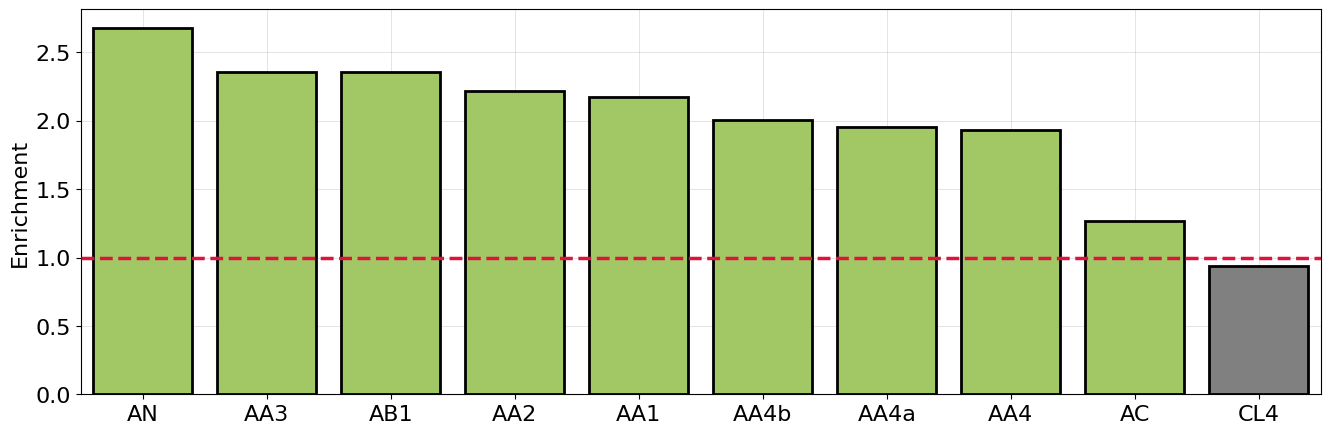

In [468]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
sns.barplot(
    data=maximum_250bp, 
    x=maximum_250bp.index, 
    # hue='allele', 
    y='Enrichment', 
    ax=ax,
    zorder=3,
    edgecolor='black',
    lw=2.0,
    palette=colors_df
)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xlabel('')
ax.tick_params(axis="both", labelsize=16, zorder=0)
ax.set_ylabel('Enrichment')
ax.axhline(1.0, linestyle='--', lw=2.5, zorder=3, color="crimson")
ax.yaxis.label.set_size(16)
fig.savefig(f"{figures}/maximum_within_250bp.png", bbox_inches='tight')

## Enrichment in Bins

In [211]:
bins_200bp = {}
for allele in alleles:
    density = allele_densities[allele]
    mean = np.mean(density)
    bins = np.zeros(29)
    # for j, i in enumerate(range(250, 6000, 500)):
    for j, i in enumerate(range(300, 6000, 200), 0):
        temp = density[i:i+200].sum()
        # print(j)
        bins[j] = temp
        if j > 27:
            break
    bins = bins / np.mean(bins)
    bins_200bp[allele] = pd.Series(bins).to_frame(name='Enrichment').reset_index().assign(index=lambda ds: ds['index']+1)

In [286]:
def make_bins(density):
    bins = np.zeros(28)
    # for j, i in enumerate(range(250, 6000, 500)):
    for j, i in enumerate(range(300, 6000, 200), 0):
        temp = density[i:i+200].mean()
        bins[j] = temp
        if j > 26:
            break
    # bins = bins / np.mean(bins)
    return pd.Series(bins).to_frame(name='Enrichment')
            
bins_200bp = {}
for allele in alleles:
    avg, ci_025, ci_975 = allele_densities_bootstrap[allele]
    
    # avg_mean = np.mean(avg)
    # avg_ci_025 = np.mean(ci_025)
    # avg_ci_975 = np.mean(ci_975)

    # avg = avg / avg_mean
    # ci_025 = ci_025 / avg_ci_025
    # ci_975 = ci_975 / avg_ci_975
    bins_avg = make_bins(avg)
    bins_ci_025 = make_bins(ci_025)
    bins_ci_975 = make_bins(ci_975)
    
    bins_200bp[allele] = bins_avg.merge(bins_ci_025, left_index=True, right_index=True, suffixes=("", "_ci_025"))\
                                 .merge(bins_ci_975, left_index=True, right_index=True, suffixes=("", "_ci_975"))\
                                 .reset_index()\
                                 .assign(index=lambda ds: ds['index']+1)

bins_200bp[allele]

,index,Enrichment,Enrichment_ci_025,Enrichment_ci_975
0,1,0.755631,0.540320,0.995477
1,2,0.777201,0.541880,1.021483
2,3,0.761011,0.564650,0.946746
3,4,0.847246,0.622396,1.039278
4,5,0.855330,0.659943,1.052383
5,6,0.863015,0.614007,1.097139
6,7,0.888241,0.651189,1.127685
7,8,0.965462,0.771155,1.141522
8,9,0.867652,0.647202,1.084310
9,10,0.853387,0.624461,1.095910


0 CL4
1 AC
2 AN
3 AA4b
4 AA4
5 AA2
6 AA4a
7 AA1
8 AB1
9 AA3


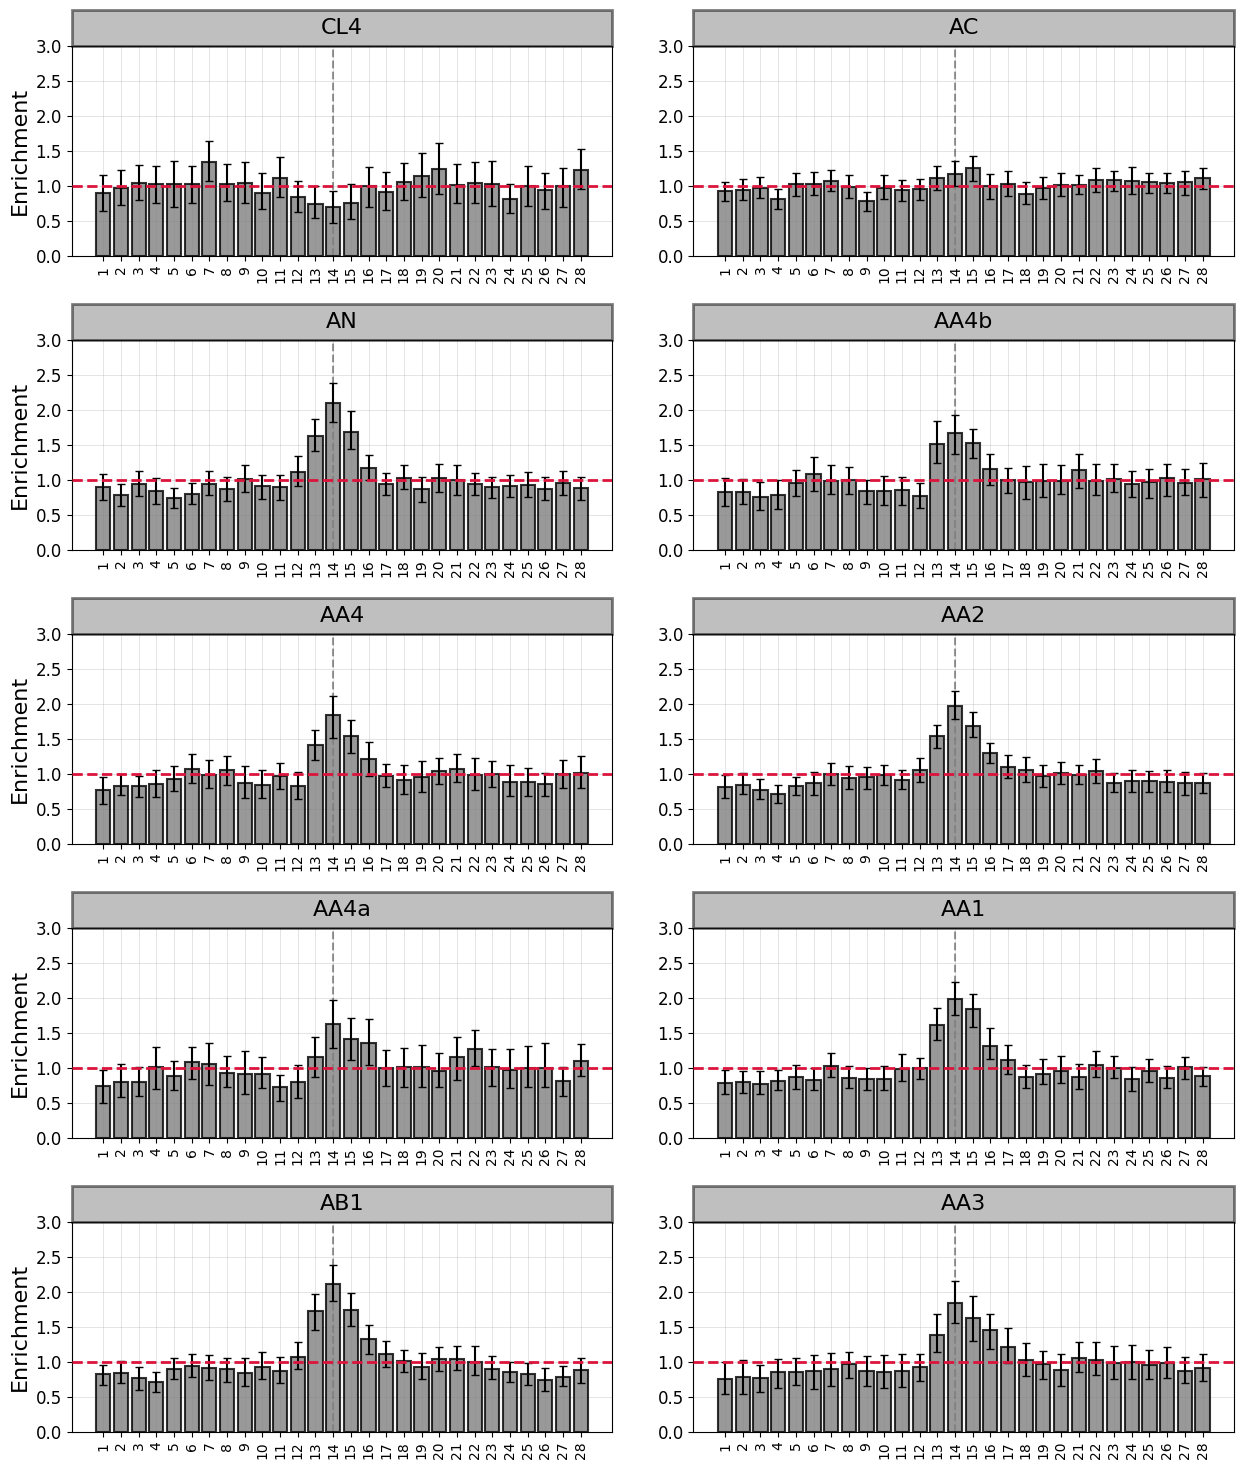

In [287]:
from matplotlib.pyplot import Rectangle
fig, ax_ = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
ax_ = ax_.flatten()
fig.subplots_adjust(wspace=0.15, hspace=0.4)

for i, (allele, density) in enumerate(bins_200bp.items()):
        ax = ax_[i]
        print(i, allele)
        sns.barplot(
                data=density, 
                x="index",
                y="Enrichment",
                color="gray",
                edgecolor='black',
                linewidth=1.5,
                # color='#d4779c',
                alpha=0.8,
                #label=allele,
                zorder=3,
                errorbar=None,
                ax=ax
                )
    
        ax.errorbar(density['index']-1, density['Enrichment'], 
            yerr=[
                  density['Enrichment'] - density['Enrichment_ci_025'], 
                  density['Enrichment_ci_975'] - density['Enrichment']
                 ],
            fmt='none', 
            c='black',
            zorder=4,
            capsize=3.0
        )
        ax.axvline(13.0, lw=1.5, zorder=1, linestyle='--', alpha=0.4, color='black')
        ax.axhline(1.0, lw=2.0, zorder=4, linestyle='--', color='crimson')
        ax.xaxis.label.set_size(14)
        # ax.legend(loc=0, prop={"size": 12})
        if i%2 == 0:
                ax.set_ylabel("Enrichment")
        else:
                ax.set_ylabel('')
        ax.set_xlabel('')
        ax.tick_params(axis="x", rotation=90, labelsize=10, zorder=0)
        ax.yaxis.label.set_size(16)
        ax.grid(lw=0.4, alpha=0.6, zorder=0)
        ax.set_axisbelow(True)
        ax.set_ylim(ymax=3)
        ax.tick_params(axis="y", labelsize=12, zorder=0)
        fig.canvas.draw()
        # Get the bounding box of the second subplot in figure coordinates
        bbox = ax.get_position()
        rect_height = 0.02  # Height of the rectangle relative to figure
        rect_bottom = bbox.y1  # Bottom of the rectangle aligns with the top of the subplot
        rect_left = bbox.x0  # Left aligns with the subplot
        rect_width = bbox.x1 - bbox.x0  # Width matches the subplot

        # Add rectangle
        fig.patches.append(Rectangle((rect_left, rect_bottom), rect_width, rect_height,
                                        edgecolor="black",
                                        linewidth=2.0,
                                        transform=fig.transFigure, 
                                        facecolor='gray', 
                                        alpha=0.5)
                                        )
        
        # Add title text
        fig.text(rect_left + rect_width / 2, rect_bottom + rect_height / 2, 
                allele, 
                ha='center', 
                va='center', 
                color='black', 
                fontsize=16
        )
    
fig.savefig(f"{figures}/HDNA_enrichment_allele_prmd9_bootstrap_28_bins.png", bbox_inches='tight')

In [169]:
for j, i in enumerate(range(300, 6000, 200)):
    temp = density[i:i+200]
    print(j, i, i+200)

0 300 500
1 500 700
2 700 900
3 900 1100
4 1100 1300
5 1300 1500
6 1500 1700
7 1700 1900
8 1900 2100
9 2100 2300
10 2300 2500
11 2500 2700
12 2700 2900
13 2900 3100
14 3100 3300
15 3300 3500
16 3500 3700
17 3700 3900
18 3900 4100
19 4100 4300
20 4300 4500
21 4500 4700
22 4700 4900
23 4900 5100
24 5100 5300
25 5300 5500
26 5500 5700
27 5700 5900
28 5900 6100


## Enrichment 3KB Window

In [255]:
def bootstrap(df, N=1_000, window_size=3000):
    extractor = PWMExtractor()
    densities = []
    for _ in tqdm(range(N), total=N, leave=True, position=0):
        sample = df.sample(frac=1.0, replace=True)
        density = np.array(
                        extractor.extract_density(
                            sample.assign(strand='+'), 
                            window_size=window_size
                                )
            )
        density = density / np.mean(density)
        densities.append(density)

    densities = pd.DataFrame(densities)
    avg = densities.mean()
    ci_975 = densities.quantile(0.975)
    ci_025 = densities.quantile(0.025)
    return avg, ci_025, ci_975

In [256]:
from mindi.coverage.pwm_density import PWMExtractor
extractor = PWMExtractor()

alleles = list(intersect_df['allele'].unique())
seqID = list(intersect_df['seqID'].unique())
allele_densities_bootie = {}

for allele in tqdm(alleles, leave=True):
    intersect_df_query = intersect_df[intersect_df['allele'] == allele]
    avg, ci_025, ci_975 = bootstrap(intersect_df_query, 
                                    N=1000, 
                                    window_size=3000)
    allele_densities_bootie[allele] = avg, ci_025, ci_975

100%|█████████▉| 998/1000 [13:45<00:01,  1.21it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [264]:
avg, ci_025, ci_975 = allele_densities_bootie["CL4"]
ci_025

0       0.653453
1       0.690214
2       0.729636
3       0.729387
4       0.729387
          ...   
5996    0.779620
5997    0.744616
5998    0.730673
5999    0.653114
6000    0.653114
Name: 0.025, Length: 6001, dtype: float64

In [265]:
avg

0       1.020540
1       1.057879
2       1.096777
3       1.095342
4       1.095342
          ...   
5996    1.177817
5997    1.139299
5998    1.099435
5999    1.024008
6000    1.024008
Length: 6001, dtype: float64

In [257]:
figures = Path("HDNA_figures")
figures.mkdir(exist_ok=True)

In [259]:
sns.color_palette("Set3")

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [433]:
!pwd

/storage/group/izg5139/default/nicole/rDNA_HDNA


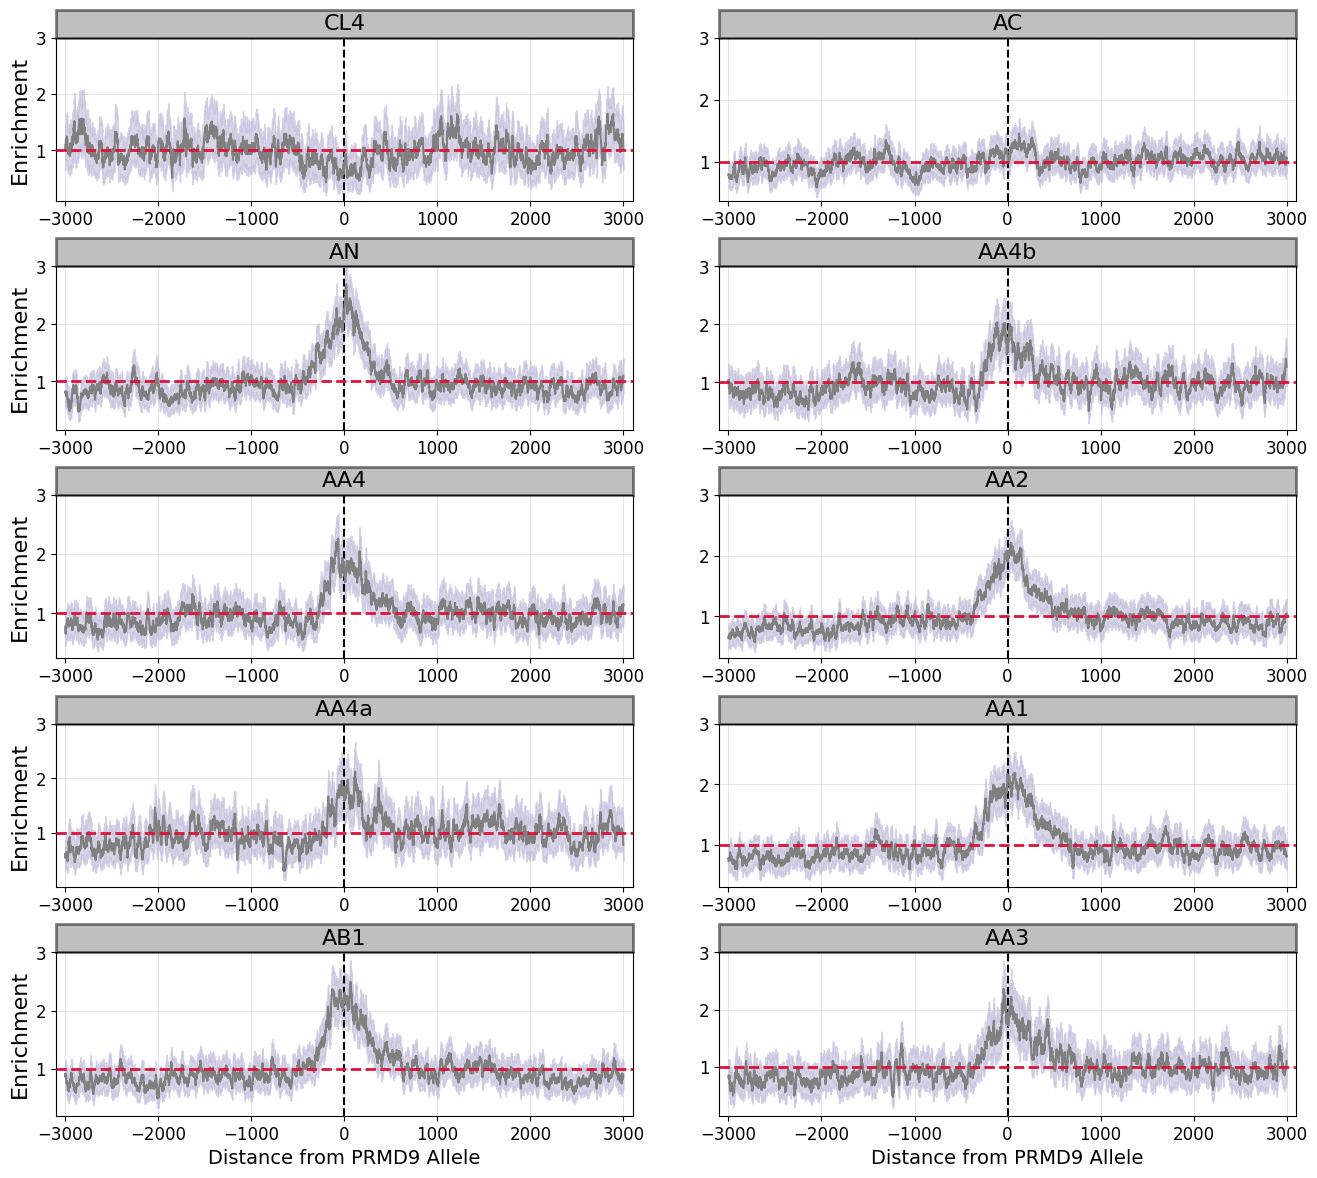

In [442]:
from matplotlib.pyplot import Rectangle

fig, ax_ = plt.subplots(nrows=5, ncols=2, figsize=(16, 14))
ax_ = ax_.flatten()
fig.subplots_adjust(wspace=0.15, hspace=0.4)

for i, (allele, density) in enumerate(allele_densities_bootie.items()):
        ax = ax_[i]
        avg, ci_025, ci_975 = density
        ax.plot(
                range(-window_size, window_size+1),
                avg,
                color='gray',
                # color='#d4779c',
                alpha=1.0,
                #label=allele,
                zorder=3
                )
        ax.fill_between(
                        x=range(-window_size, window_size+1),
                        y1=ci_025,
                        y2=ci_975,
                        color=sns.color_palette("Set3")[2],
                        alpha=0.6,
                        zorder=2
        )
        # ax.set_title(allele)
        ax.axvline(0.0, linestyle='--', color='black')
        ax.title.set_size(12)
        ax.grid(lw=0.4, alpha=0.6, zorder=0)
        if i == 8 or i == 9:
                ax.set_xlabel("Distance from PRMD9 Allele")
        else:
                ax.set_xlabel('')

        ax.axhline(1.0, lw=2.0, zorder=4, linestyle='--', color='crimson')
        ax.xaxis.label.set_size(14)
        # ax.legend(loc=0, prop={"size": 12})
        if i%2 == 0:
                ax.set_ylabel("Enrichment")
        else:
                ax.set_ylabel('')
        ax.yaxis.label.set_size(16)
        ax.set_xlim(xmin=-window_size - 100, xmax=window_size + 100)
        ax.set_ylim(ymax=3.0)
        ax.tick_params(axis="both", labelsize=12, zorder=0)
        fig.canvas.draw()
        # Get the bounding box of the second subplot in figure coordinates
        bbox = ax.get_position()
        rect_height = 0.02  # Height of the rectangle relative to figure
        rect_bottom = bbox.y1  # Bottom of the rectangle aligns with the top of the subplot
        rect_left = bbox.x0  # Left aligns with the subplot
        rect_width = bbox.x1 - bbox.x0  # Width matches the subplot

        # Add rectangle
        fig.patches.append(Rectangle((rect_left, rect_bottom), rect_width, rect_height,
                                        edgecolor="black",
                                        linewidth=2.0,
                                        transform=fig.transFigure, 
                                        facecolor='gray', 
                                        alpha=0.5)
                                        )
        
        # Add title text
        fig.text(rect_left + rect_width / 2, rect_bottom + rect_height / 2, 
                allele, 
                ha='center', 
                va='center', 
                color='black', 
                fontsize=16
        )
    
fig.savefig(f"{figures}/HDNA_enrichment_allele_prmd9_bootstrap_3kb.png", bbox_inches='tight')

## Polynomial Distance

In [270]:
def calculate_poly(intersect_df, step: int = 20):
        step = step
        intersect_df["bin_dist"] = pd.cut(
                                        np.abs(intersect_df["distance"]), 
                                        range(0, window_size+step, step),
                                        include_lowest=True,
                                        labels=False
                                        )
        # intersect_df["bin_dist"].value_counts()
        grouped = intersect_df.groupby("bin_dist", as_index=False)\
                              .agg(total=("overlap", "count"))
        
        x_data = grouped['bin_dist']
        y_data = grouped['total']
        params, _ = curve_fit(poly3, x_data, y_data)
        b, c, d, e, f = params
        return grouped, x_data, poly3(x_data, b, c, d, e, f), params

In [271]:
def tangent(x, b, c, d, e):
    return 4 * b * x ** 3 + 3 * c * x ** 2 + 2 * d * x + e

0 CL4
1 AC
2 AN
3 AA4b
4 AA4
5 AA2
6 AA4a
7 AA1
8 AB1
9 AA3


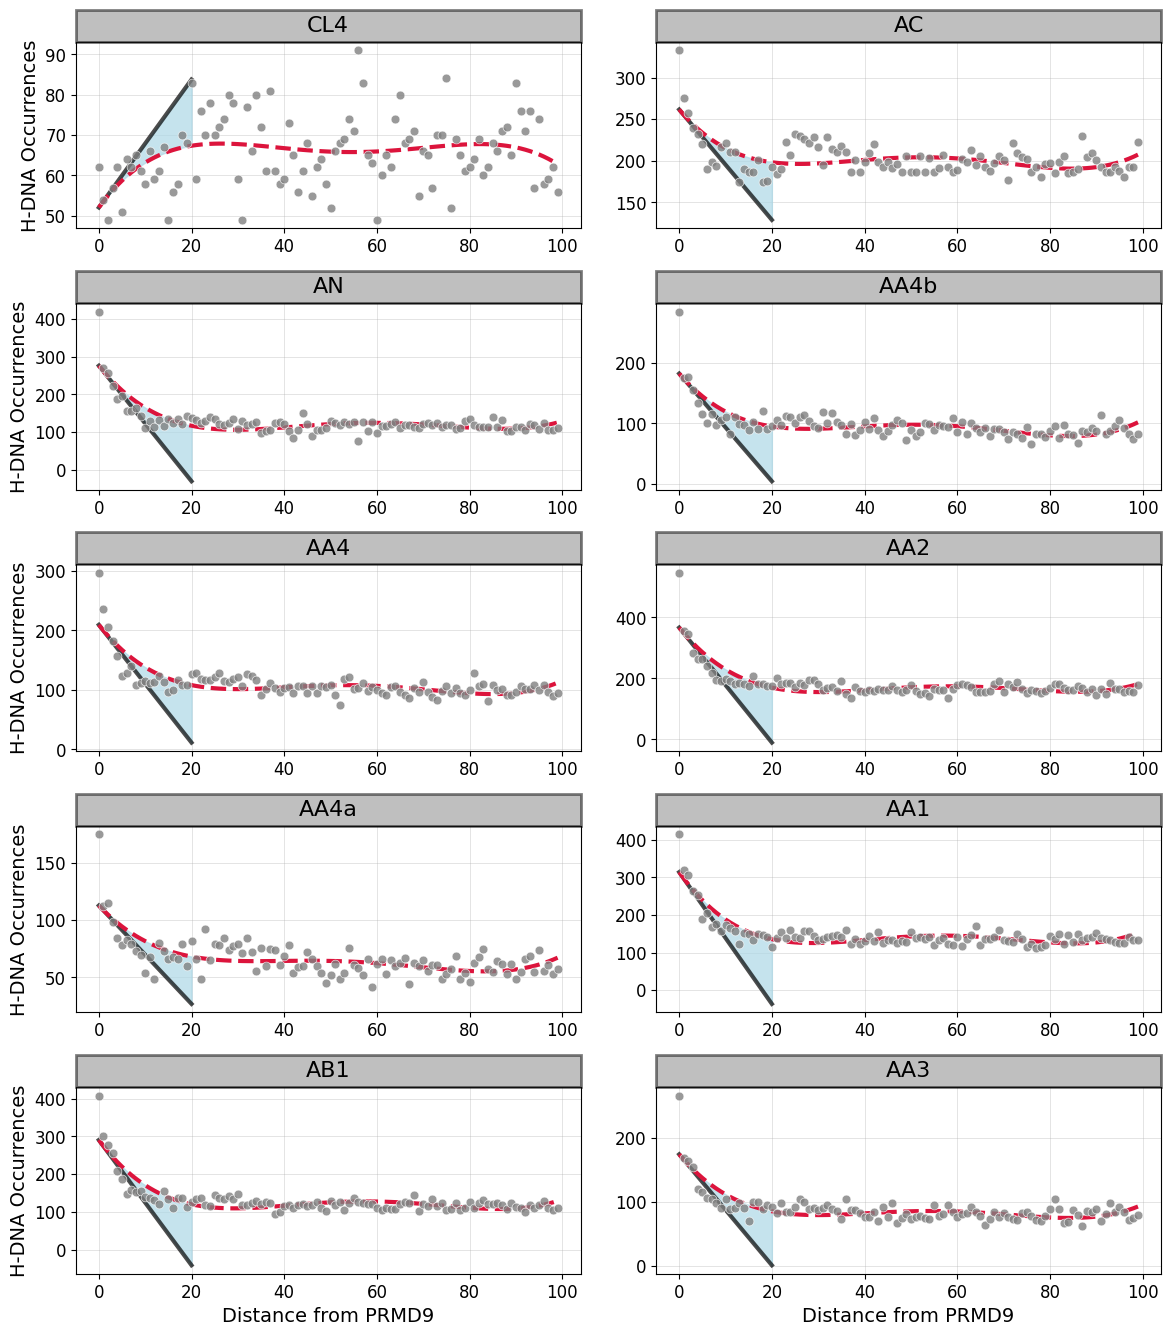

In [327]:
fig, ax_ = plt.subplots(nrows=5, ncols=2, figsize=(14, 16))
ax_ = ax_.flatten()
fig.subplots_adjust(wspace=0.15, hspace=0.4)
step = 50
for i, allele in enumerate(allele_densities.keys()):
    print(i, allele)
    ax = ax_[i]
    grouped, x_data, y_data, params = calculate_poly(intersect_df.query(f"allele == '{allele}'").copy(), step=step)
    b, c, d, e, f = params
    sns.scatterplot(
                    data=grouped, 
                    x="bin_dist", 
                    y="total", 
                    ax=ax, 
                    color='gray', 
                    alpha=0.8,
                    s=40, 
                    zorder=5
                    )
    xrange = np.linspace(0, 20, 200)
    x0 = 0
    poly =  poly3(xrange, b, c, d, e, f)
    tan = [ (i - x0) * tangent(x0, b, c, d, e) + poly3(x0, b, c, d, e, f) for i in xrange]
    ax.plot(xrange, tan, lw=3.0, zorder=4, color='black', alpha=0.7)
    ax.fill_between(xrange, y1=tan, y2=poly, color='lightblue', alpha=0.7, zorder=2)
    ax.plot(x_data, 
            y_data, 
            color='crimson', 
            lw=3.0, 
            linestyle='--',
            zorder=4,
            label="4th Degree Polynomial"
            )
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    ax.set_xlabel("Distance from PRMD9 Allele")
    ax.xaxis.label.set_size(14)
    ax.legend(handles=[], frameon=False)
    # ax.legend(loc=0, prop={"size": 12})
    ax.set_ylabel("H-DNA Occurrences")
    ax.yaxis.label.set_size(14)
    # ax.set_xlim(xmin=-1)
    ax.tick_params(axis="both", labelsize=12, zorder=0)

    if i%2 == 1:
        ax.set_ylabel('')
    if i != 8 and i != 9:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Distance from PRMD9')

    fig.canvas.draw()
    # Get the bounding box of the second subplot in figure coordinates
    bbox = ax.get_position()
    rect_height = 0.02  # Height of the rectangle relative to figure
    rect_bottom = bbox.y1  # Bottom of the rectangle aligns with the top of the subplot
    rect_left = bbox.x0  # Left aligns with the subplot
    rect_width = bbox.x1 - bbox.x0  # Width matches the subplot

    # Add rectangle
    fig.patches.append(Rectangle((rect_left, rect_bottom), rect_width, rect_height,
                                    edgecolor="black",
                                    linewidth=2.0,
                                    transform=fig.transFigure, 
                                    facecolor='gray', 
                                    alpha=0.5))
    
    # Add title text
    fig.text(rect_left + rect_width / 2, rect_bottom + rect_height / 2, 
            allele, 
            ha='center', 
            va='center', 
            color='black', 
            fontsize=16
    )


In [138]:
window_size = 20_000
maker = WindowMaker(base=0, window_size=window_size)
core_oric = maker.make_windows(
                                pd.read_table(
                                             "GSE128477_Core_origins_hs1.bed", 
                                             names=["seqID", "start", "end", "id"]
                                             ), 
                                             loci="mid"
)

core_oric_bed = BedTool.from_dataframe(core_oric).sort()
core_oric.head()

,seqID,start,end,id
0,chr11,0,32933,HO_5
1,chr11,8229,48230,HO_8
2,chr11,43655,83656,HO_13
3,chr1,221690773,221730774,HO_24
4,chr1,221722542,221762543,HO_25


In [142]:
# COVERAGE_FIELDS = ["totalHits", "overlappingBp", "compartmentLength", "coverage"]


# # prmd9_bed = BedTool.from_dataframe(peaks_bed).sort()
# core_prmd9_df = pd.read_table(
#                             core_oric_bed.intersect(peaks_bed.slop(l=500, r=500, g="genome.txt"), wo=True).fn,
#                                 header=None,
#                                 names=["seqID", "start", "end", "id"] + ["chrom", "motif_start", "motif_end", "allele", "overlap"]
#                         )
# core_prmd9_df["strand"] = "+"

# alleles = core_prmd9_df['allele'].unique()

# for allele in alleles:
#         print(allele)
#         core_density = np.array(extractor.extract_density(core_prmd9_df.query(f"allele == '{allele}'"), 
#                                                           window_size=window_size))
#         plt.plot(range(-window_size, window_size+1), core_density)
#         plt.show()

In [61]:
# intersect_df['distance'].min(), intersect_df['distance'].max(), window_size+step, window_size

In [62]:
step = 500 
intersect_df["bin_dist"] = pd.cut(np.abs(intersect_df["distance"]), 
                                  range(0, window_size+step, step),
                                  include_lowest=True,
                                  labels=False)
intersect_df["bin_dist"].value_counts()

bin_dist
0    36689
2    26278
1    25017
3    24950
5    23715
4    22818
Name: count, dtype: int64

In [435]:
!ls figures

ls: cannot access 'figures': No such file or directory


In [63]:
total = intersect_df.groupby("allele", as_index=False).agg(total=("bin_dist", "count"))

grouped = intersect_df.groupby(["allele", "bin_dist"], as_index=False)\
                                .agg(total_counts=("overlap", "count"))\
                            .merge(total, on="allele", how="left")\
                            .assign(perc=lambda ds: 1e2 * ds['total_counts'] / ds['total'])
grouped

,allele,bin_dist,total_counts,total,perc
0,AA1,0,5049,19389,26.040538
1,AA1,1,3014,19389,15.544897
2,AA1,2,2969,19389,15.312806
3,AA1,3,2891,19389,14.910516
4,AA1,4,2695,19389,13.899634
5,AA1,5,2771,19389,14.291609
6,AA2,0,5930,23636,25.088848
7,AA2,1,3849,23636,16.284481
8,AA2,2,3908,23636,16.534101
9,AA2,3,3467,23636,14.668303


In [148]:
g4_bed = BedTool.from_dataframe(g4_df[["seqID", "start", "end", "sequence"]]).sort().merge()
intersect_g4_df = pd.read_table(
                    peaks_bed.intersect(g4_bed, wo=True).fn,
                    header=None,
                    names=peaks_df.columns.tolist() + ["chrom", "motif_start", "motif_end", "overlap"]
)

intersect_g4_df["mid"] = intersect_g4_df["start"] + window_size # + intersect_df["end"]) // 2
intersect_g4_df["distance"] = np.minimum( abs(intersect_g4_df["motif_start"] - intersect_g4_df["mid"]), 
                                      abs(intersect_g4_df["motif_end"] -1 - intersect_g4_df["mid"])
                                      )
print(intersect_g4_df.drop_duplicates(subset=peaks_df.columns.tolist()).allele.value_counts())
intersect_g4_df["bin_dist"] = pd.qcut(intersect_g4_df["distance"], 4, labels=False)
intersect_g4_df

allele
AC      41683
AA2     34702
AA1     28671
AB1     24305
AN      24278
AA4     21172
AA4b    18373
AA3     16408
CL4     13942
AA4a    12272
Name: count, dtype: int64


,seqID,start,end,allele,chrom,motif_start,motif_end,overlap,mid,distance,bin_dist
0,chr1,283559,289560,AC,chr1,284828,284856,28,286559,1704,2
1,chr1,283559,289560,AC,chr1,286629,286656,27,286559,70,0
2,chr1,283559,289560,AC,chr1,286707,286742,35,286559,148,0
3,chr1,283559,289560,AC,chr1,287453,287506,53,286559,894,1
4,chr1,286970,292971,AC,chr1,287453,287506,53,289970,2465,3
...,...,...,...,...,...,...,...,...,...,...,...
1238871,chrY,27294585,27300586,AC,chrY,27295958,27295986,28,27297585,1600,2
1238872,chrY,27381001,27387002,AC,chrY,27384661,27384686,25,27384001,660,1
1238873,chrY,27381001,27387002,AC,chrY,27386779,27386806,27,27384001,2778,3
1238874,chrY,27427539,27433540,AC,chrY,27430205,27430238,33,27430539,302,0


In [149]:
from mindi.coverage.pwm_density import PWMExtractor

extractor = PWMExtractor()
alleles = list(intersect_df['allele'].unique())
seqID = list(intersect_df['seqID'].unique())

allele_g4_densities = {}
for allele in alleles:
    intersect_df_query = intersect_g4_df[intersect_g4_df['allele'] == allele]
    density = np.array(
                        extractor.extract_density(
                            intersect_df_query.assign(strand='+'), 
                            window_size=window_size
                        )
            )
    allele_g4_densities[allele] = density
    
print(allele_g4_densities.keys())

dict_keys(['CL4', 'AC', 'AN', 'AA4b', 'AA4', 'AA2', 'AA4a', 'AA1', 'AB1', 'AA3'])


In [174]:
!mv GCF_009914755.1_T2T-CHM13v2.0_genomic.mapped.gff.gz GCF_009914755.1_T2T-CHM13v2.0_genomic.mapped.gff

In [182]:
!head chm13v2.0_SVA.bed

chr1	33201157	33201208	SVA_A
chr1	203452249	203452293	SVA_B
chr15	15074264	15074335	SVA_A
chr4	3226413	3226603	SVA_F
chr1	157687	157800	SVA_E
chr1	164502	164615	SVA_E
chr1	266063	266144	SVA_D
chr1	816150	816180	SVA_A
chr1	816489	816645	SVA_A
chr1	3448481	3448497	SVA_A


In [183]:
def load_compartments():
    def _merge_overlaps(compartments, col, col_index):
        comp = compartments[col].unique()
        merged_comp = []
        for c in tqdm(comp):
            temp = pd.read_table(
                BedTool.from_dataframe(compartments[compartments[col] == c]).sort().merge(c=col_index, o="distinct").fn,
                header=None,
                names=['seqID', 'start', 'end', 'compartment'])
            merged_comp.append(temp)
        merged_comp = pd.concat(merged_comp)
        return merged_comp
    
    compartments = pd.read_table("chm13v2.0_censat_v2.1.bed", skiprows=1, names=["seqID", "start", "end", "compartment"], header=None, usecols=range(4))
    compartments["compartment"] = compartments["compartment"].apply(lambda x: x.split('_')[0])
    compartments = _merge_overlaps(compartments, "compartment", 4)

    # sva & alu
    sva_df = pd.read_table("chm13v2.0_SVA.bed", header=None, names=["seqID", "start", "end"], usecols=range(3)).assign(compartment="SVA")
    alu_df = pd.read_table("chm13v2.0_Alu.bed", header=None, names=["seqID", "start", "end"], usecols=range(3)).assign(compartment="Alu")

    # gff
    gff_df = pd.read_table("GCF_009914755.1_T2T-CHM13v2.0_genomic.mapped.gff", 
                           comment="#", 
                           header=None,
                           names=["seqID", "source", "compartment", "start", "end"], 
                           usecols=range(5)
                           )
    gff_df = gff_df[["seqID", "start", "end", "compartment"]]
    gff_df = gff_df.query("compartment == 'gene' | compartment == 'exon' | compartment == 'CDS' | compartment == 'enhancer' | compartment == 'silencer'").copy()
    gff_df = _merge_overlaps(gff_df, "compartment", 4)
    return pd.concat([sva_df, alu_df, compartments, gff_df], axis=0)

compartments_df = load_compartments()
compartments_bed = BedTool.from_dataframe(compartments_df).sort()
compartments_df.head(10)

100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


,seqID,start,end,compartment
0,chr1,33201157,33201208,SVA
1,chr1,203452249,203452293,SVA
2,chr15,15074264,15074335,SVA
3,chr4,3226413,3226603,SVA
4,chr1,157687,157800,SVA
5,chr1,164502,164615,SVA
6,chr1,266063,266144,SVA
7,chr1,816150,816180,SVA
8,chr1,816489,816645,SVA
9,chr1,3448481,3448497,SVA


In [186]:
queries = intersect_df_query[["seqID", "motif_start", "motif_end", "overlap"]].drop_duplicates(subset=['seqID', 'motif_start', 'motif_end']).reset_index(drop=True)
queries_bed = BedTool.from_dataframe(queries).sort()

coverage_df = pd.read_table(
                    compartments_bed.coverage(queries_bed).fn,
                    header=None,
                    names=["seqID", "start", "end", "compartment"] + COVERAGE_FIELDS

).query("coverage > 0")
coverage_df

,seqID,start,end,compartment,totalHits,overlappingBp,compartmentLength,coverage
198,chr1,289156,306720,gene,7,233,17564,0.013266
201,chr1,295855,296354,enhancer,1,26,499,0.052104
203,chr1,298769,299178,silencer,1,2,409,0.004890
221,chr1,334801,338527,gene,8,419,3726,0.112453
222,chr1,334801,334950,exon,1,16,149,0.107383
...,...,...,...,...,...,...,...,...
1831929,chrY,22644665,22659317,gene,2,67,14652,0.004573
1831931,chrY,22645683,22790092,censat,3,105,144409,0.000727
1831934,chrY,22654961,22655181,Alu,1,31,220,0.140909
1833770,chrY,27262485,27262766,Alu,1,33,281,0.117438


In [189]:
queries = intersect_df_query[["seqID", "motif_start", "motif_end", "overlap"]].drop_duplicates(subset=['seqID', 'motif_start', 'motif_end']).reset_index(drop=True)
queries_bed = BedTool.from_dataframe(queries).sort()

coverage_df = pd.read_table(
                    queries_bed.intersect(compartments_bed, wo=True).fn,
                    header=None,
                    names=["seqID", "start", "end", "query"] + ["chrom", "comp_start", "comp_end", "compartment", "overlap"] # COVERAGE_FIELDS

)
coverage_df

,seqID,start,end,query,chrom,comp_start,comp_end,compartment,overlap
0,chr1,296188,296214,26,chr1,295855,296354,enhancer,26
1,chr1,296188,296214,26,chr1,289156,306720,gene,26
2,chr1,298586,298619,33,chr1,289156,306720,gene,33
3,chr1,298721,298771,50,chr1,298769,299178,silencer,2
4,chr1,298721,298771,50,chr1,289156,306720,gene,50
...,...,...,...,...,...,...,...,...,...
90406,chrY,22656340,22656376,36,chrY,22644665,22659317,gene,36
90407,chrY,22656340,22656376,36,chrY,22645683,22790092,censat,36
90408,chrY,22681165,22681203,38,chrY,22645683,22790092,censat,38
90409,chrY,27262711,27262744,33,chrY,27262485,27262766,Alu,33


In [192]:
coverage_df.compartment.value_counts().sort_values(ascending=False)

compartment
gene        62666
exon        11081
enhancer     7116
CDS          3376
ct           2515
Alu          1761
silencer     1504
SVA           331
censat         60
bsat            1
Name: count, dtype: int64

In [377]:
!pip install -q logomaker 
import logomaker

In [69]:

# # create Logo object
# for allele, pwm in allele_pwm.items():
#     print(allele)
#     ss_logo = logomaker.Logo(pwm.iloc[225:275, :],
#                          width=.8,
#                          vpad=.05,
#                          fade_probabilities=True,
#                          stack_order='small_on_top',
#                          color_scheme='dodgerblue',
#                          # font_name='Rosewood Std'
#                          )

#     # style using Logo methods
#     ss_logo.style_spines(spines=['left', 'right'], visible=False)

#     # style using Axes methods
#     # ss_logo.ax.set_xticks(range(len(pwm)))
#     # ss_logo.ax.set_xticklabels('%+d'%x for x in [-3, -2, -1, 1, 2, 3, 4, 5, 6])
#     ss_logo.ax.set_yticks([0, .5, 1])
#     ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
#     ss_logo.ax.set_ylabel('probability')
#     plt.show()
#     plt.close()

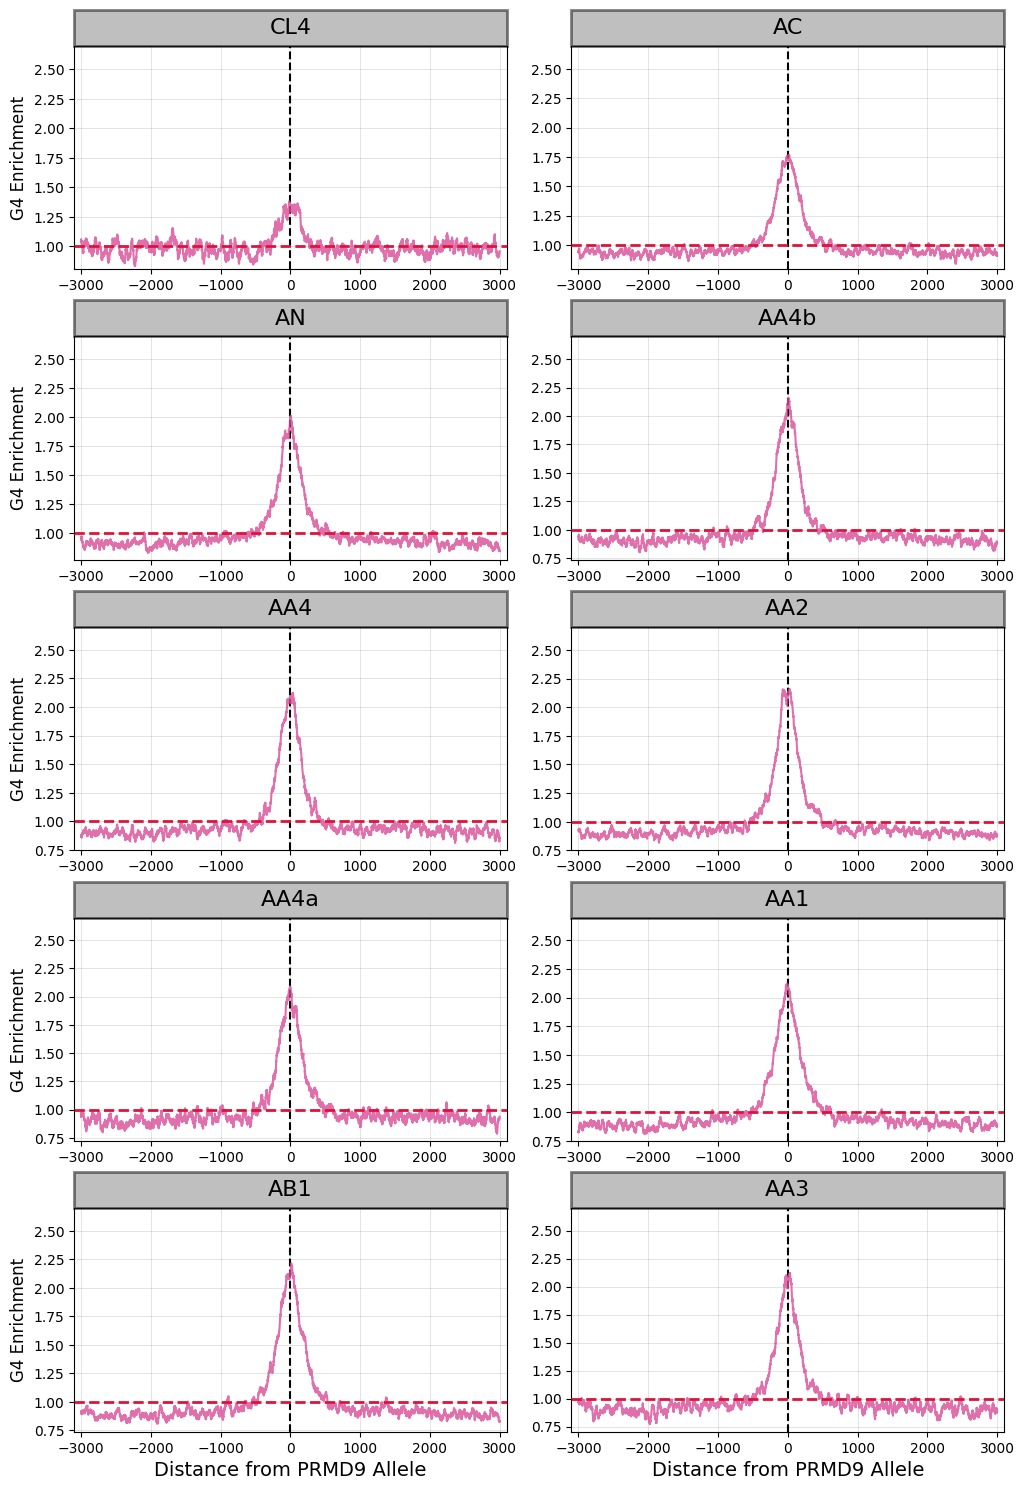

In [157]:
from matplotlib.pyplot import Rectangle
fig, ax_ = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))
ax_ = ax_.flatten()
fig.subplots_adjust(wspace=0.15, hspace=0.3)

for i, (allele, density) in enumerate(allele_g4_densities.items()):
        ax = ax_[i]
        ax.plot(
                range(-window_size, window_size+1),
                density / np.mean(density), 
                color="#d94c96",
                alpha=0.8,
                #label=allele,
                zorder=3
                )
        # ax.set_title(allele)
        ax.axvline(0.0, linestyle='--', color='black')
        ax.title.set_size(12)
        ax.grid(lw=0.4, alpha=0.6, zorder=0)
        if i == 8 or i == 9:
                ax.set_xlabel("Distance from PRMD9 Allele")
        else:
                ax.set_xlabel('')

        ax.axhline(1.0, lw=2.0, zorder=4, linestyle='--', color='crimson')
        ax.xaxis.label.set_size(14)
        # ax.legend(loc=0, prop={"size": 12})
        if i%2 == 0:
                ax.set_ylabel("G4 Enrichment")
        else:
                ax.set_ylabel('')
        ax.yaxis.label.set_size(12)
        ax.set_xlim(xmin=-window_size - 100, xmax=window_size + 100)
        ax.set_ylim(ymax=2.7)
        ax.tick_params(axis="both", labelsize=10, zorder=0)
  
        fig.canvas.draw()
        # Get the bounding box of the second subplot in figure coordinates
        bbox = ax.get_position()
        rect_height = 0.02  # Height of the rectangle relative to figure
        rect_bottom = bbox.y1  # Bottom of the rectangle aligns with the top of the subplot
        rect_left = bbox.x0  # Left aligns with the subplot
        rect_width = bbox.x1 - bbox.x0  # Width matches the subplot

        # Add rectangle
        fig.patches.append(Rectangle((rect_left, rect_bottom), rect_width, rect_height,
                                        edgecolor="black",
                                        linewidth=2.0,
                                        transform=fig.transFigure, facecolor='gray', alpha=0.5))
        
        # Add title text
        fig.text(rect_left + rect_width / 2, rect_bottom + rect_height / 2, 
                allele, 
                ha='center', 
                va='center', 
                color='black', 
                fontsize=16
                )